In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

#Packages

In [ ]:
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install scikit-learn==1.2.2
!pip install pandas==1.5.3
!pip install tqdm==4.66.1
!pip install packaging==23.1
!pip install slicer==0.0.7
!pip install numba==0.56.4
!pip install cloudpickle==2.2.1
!pip install llvmlite==0.39.1
!pip install python-dateutil==2.8.2
!pip install pytz==2023.3
!pip install joblib==1.3.2
!pip install threadpoolctl==3.2.0
!pip install shap==0.42.1
!pip install umap-learn==0.5.3
!pip install pynndescent==0.5.10
!pip install hdbscan==0.8.33
!pip install cython==0.29.36
!pip install xgboost==1.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import shap
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, train_test_split

#Data

In [ ]:
url = 'https://raw.githubusercontent.com/resendislab/POST_COVID_Metabolome_MachineLearning/main/Data/Data.csv'

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(url)

In [ ]:
df = df.set_index('Folio')

In [ ]:
matrix = df.iloc[:,2:]

In [ ]:
labels = df.iloc[:,:2]
labels

GROUP    GROUP2
Folio                               
CV19-0007A         CONTROL   CONTROL
CV19-0071A         CONTROL   CONTROL
CV19-0079A         CONTROL   CONTROL
CV19-0118A         CONTROL   CONTROL
CV19-0125A         CONTROL   CONTROL
...                    ...       ...
CV19-0830A  CRITICALLY ILL  COVID-19
CV19-0833A  CRITICALLY ILL  COVID-19
CV19-0834A  CRITICALLY ILL  COVID-19
CV19-0932A  CRITICALLY ILL  COVID-19
CV19-0936A  CRITICALLY ILL  COVID-19

[228 rows x 2 columns]

In [ ]:
labels['GROUP2'].unique()

array(['CONTROL', 'COVID-19', 'POST-COVID'], dtype=object)

#CONTROL VS COVID-19

In [ ]:
# Filtering out "POST-COVID" samples from the dataset.
m_ctrl_vs_covid = matrix[labels['GROUP2'] != "POST-COVID"]  # Matrix of features excluding POST-COVID samples.
l_ctrl_vs_covid = labels[labels['GROUP2'] != "POST-COVID"]  # Corresponding labels excluding POST-COVID samples.

# Mapping textual labels to numeric values for machine learning compatibility.
dictionary = {'CONTROL': 0, 'COVID-19': 1}
l_ctrl_vs_covid = l_ctrl_vs_covid['GROUP2'].replace(dictionary)  # Replacing textual labels in the dataset.

# Setting up the dataset for analysis.
X = m_ctrl_vs_covid  # Features matrix.
y = l_ctrl_vs_covid.values  # Target variable as a numpy array.



##Hyperparameter tuning Random Search

In [ ]:

"""

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the parameter distribution for random search
param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': randint(100, 501),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
#Create an XGBoost classifier
model = xgb.XGBClassifier()

#Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5,random_state=42)
random_search.fit(X_train, y_train)

#Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Set Score: ", random_search.score(X_test, y_test))
"""


'\n\n# Step 2: Split the data into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Step 3: Define the parameter distribution for random search\nparam_dist = {\n    \'max_depth\': randint(3, 7),\n    \'learning_rate\': [0.1, 0.01, 0.001, 0.0001],\n    \'n_estimators\': randint(100, 501),\n    \'subsample\': uniform(0.4, 0.6),\n    \'colsample_bytree\': uniform(0.4, 0.6),\n    \'gamma\': [0, 0.1, 0.2, 0.3, 0.4, 0.5],\n    \'reg_alpha\': [0, 0.1, 0.5, 1],\n    \'reg_lambda\': [0, 0.1, 0.5, 1]\n}\n# Step 4: Create an XGBoost classifier\nmodel = xgb.XGBClassifier()\n\n# Step 5: Perform random search\nrandom_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5,random_state=42)\nrandom_search.fit(X_train, y_train)\n\n# Step 6: Print the best hyperparameters and evaluation scores\nprint("Best Hyperparameters: ", random_search.best_params_)\nprint("Best Score: ", random_search.best_sc

In [ ]:
best_params_=  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}

"""
Best Hyperparameters:  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}
Best Score:  0.8889162561576354
Test Set Score:  0.9444444444444444
"""

"\nBest Hyperparameters:  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}\nBest Score:  0.8889162561576354\nTest Set Score:  0.9444444444444444\n"

Accuracy: 0.9444444444444444
AUC: 0.9910714285714286


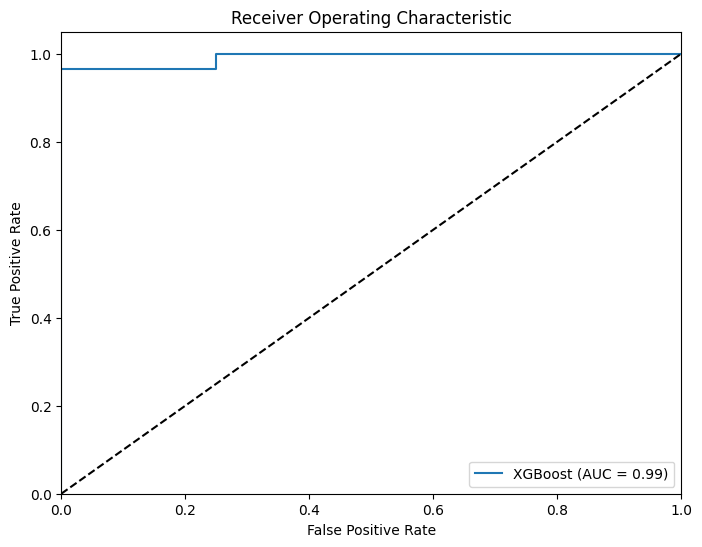

Cross-Validation Scores: [0.86111111 0.88888889 0.88888889 0.97222222 0.91666667]
Average CV Accuracy: 0.9055555555555556


In [ ]:
X = m_ctrl_vs_covid
y = l_ctrl_vs_covid.values

#Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the XGBoost classifier
model = xgb.XGBClassifier(**best_params_)
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


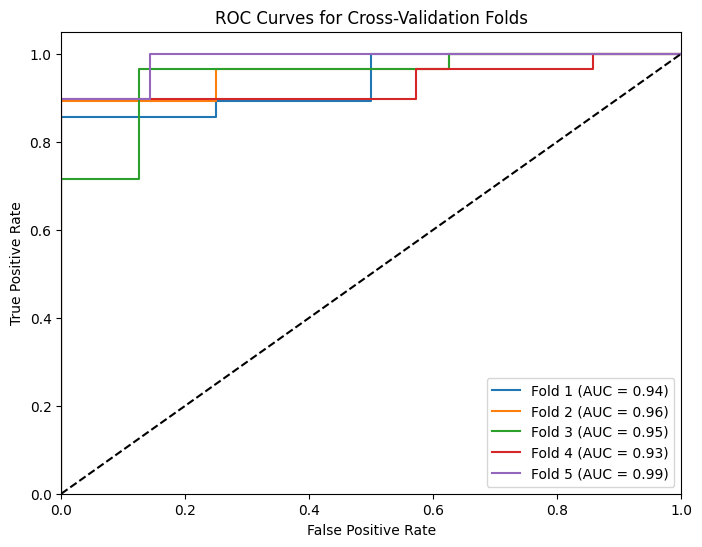

In [ ]:
#Train the XGBoost classifier and plot individual ROC curves for each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBClassifier(**best_params_)
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross-Validation Folds')
plt.legend(loc='lower right')
plt.show()



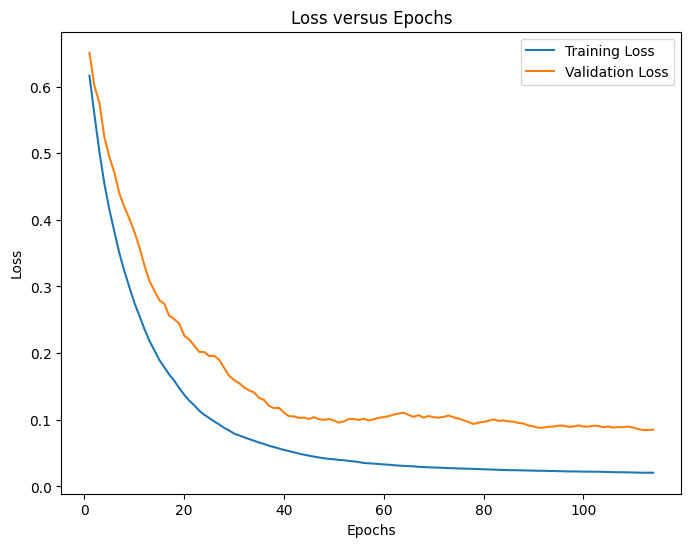

In [ ]:
#Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Train the XGBoost classifier with monitoring the loss
model = xgb.XGBClassifier(**best_params_,eval_metric='logloss')
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

#Extract the training history
results = model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']
epochs = range(1, len(train_loss) + 1)

#Plot the loss versus epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss versus Epochs')
plt.legend()
plt.show()


#SHAP

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an XGBoost classifier with early stopping
model = xgb.XGBClassifier(**best_params_, eval_metric='logloss')
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=40, eval_set=eval_set, verbose=False)

#Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.9444444444444444


In [ ]:
# Assuming you have a NumPy array named "arr"
with open('shap_values_ctrl_covid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)

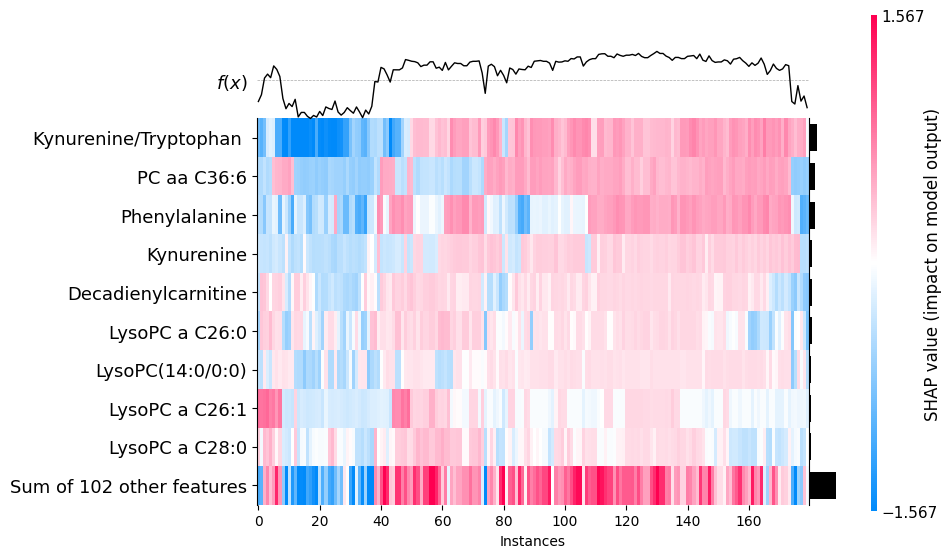

In [ ]:
shap_values_explaination = shap.Explanation(shap_values, feature_names=m_ctrl_vs_covid.columns.tolist())
shap.plots.heatmap(shap_values_explaination)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


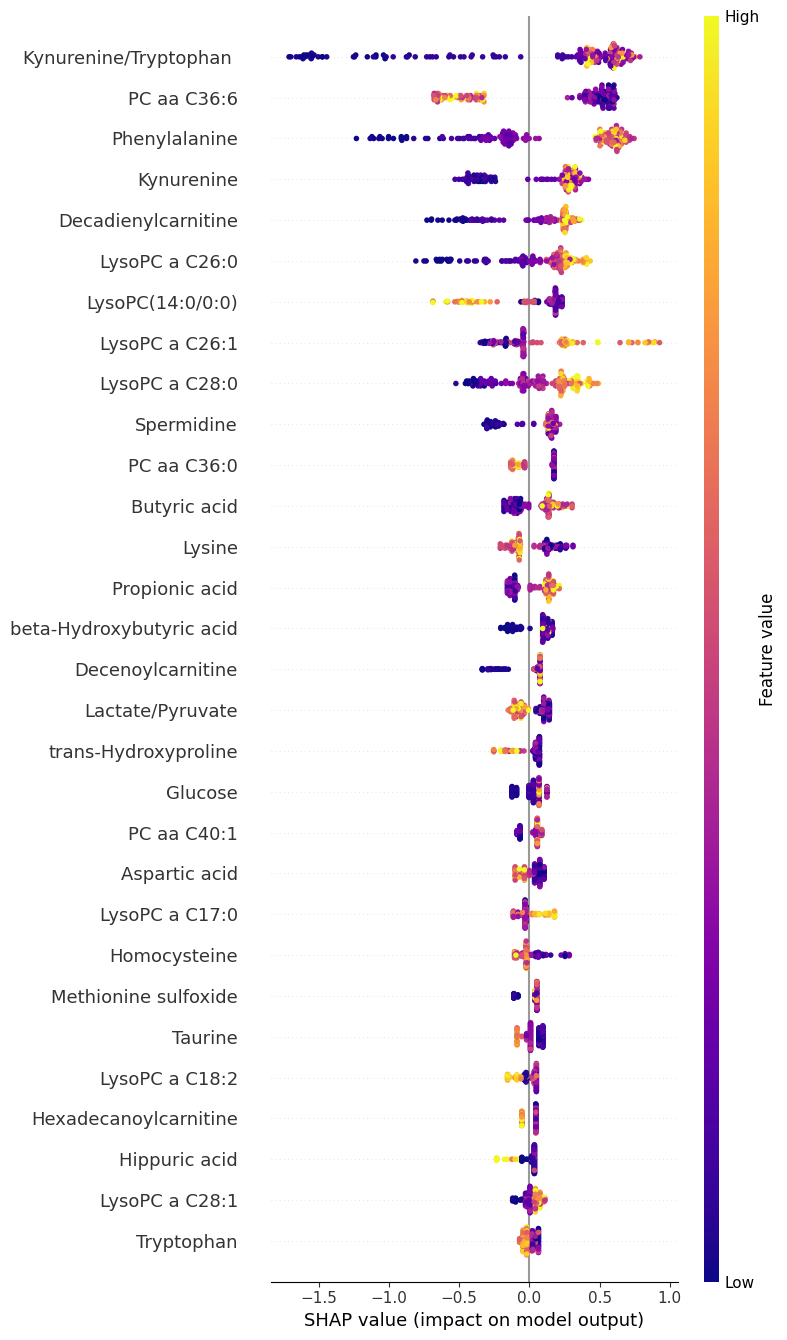

In [ ]:
shap.summary_plot(shap_values, X,cmap = "plasma",max_display=30)

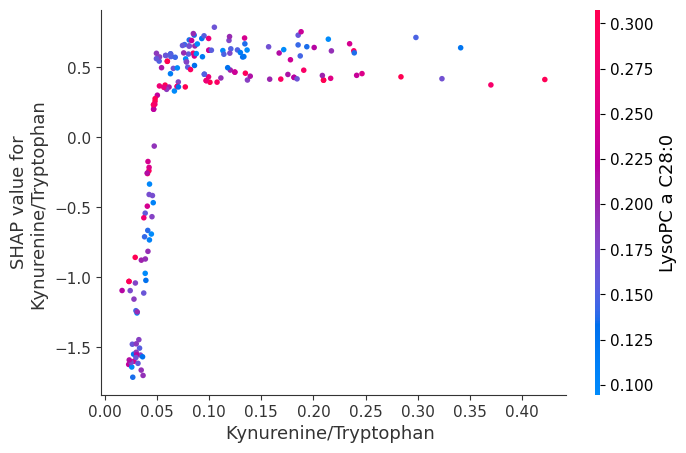

In [ ]:
shap.dependence_plot('Kynurenine/Tryptophan ', shap_values, X, interaction_index="LysoPC a C28:0")

In [ ]:
labels['GROUP2']

Folio
CV19-0007A     CONTROL
CV19-0071A     CONTROL
CV19-0079A     CONTROL
CV19-0118A     CONTROL
CV19-0125A     CONTROL
                ...   
CV19-0830A    COVID-19
CV19-0833A    COVID-19
CV19-0834A    COVID-19
CV19-0932A    COVID-19
CV19-0936A    COVID-19
Name: GROUP2, Length: 228, dtype: object

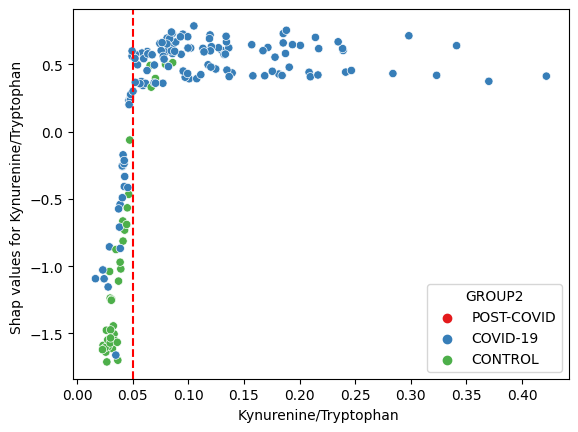

In [ ]:
string = 'Kynurenine/Tryptophan '
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP2'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

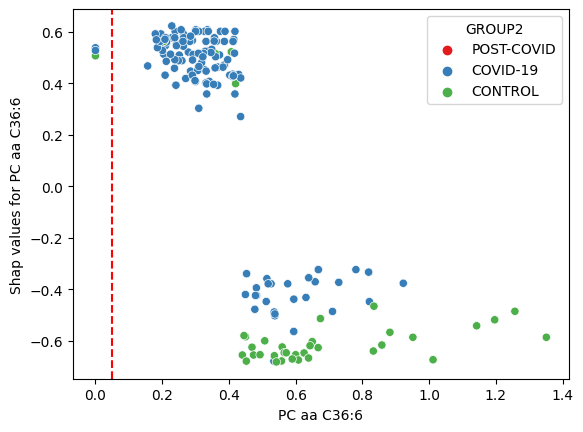

In [ ]:
string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP2'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

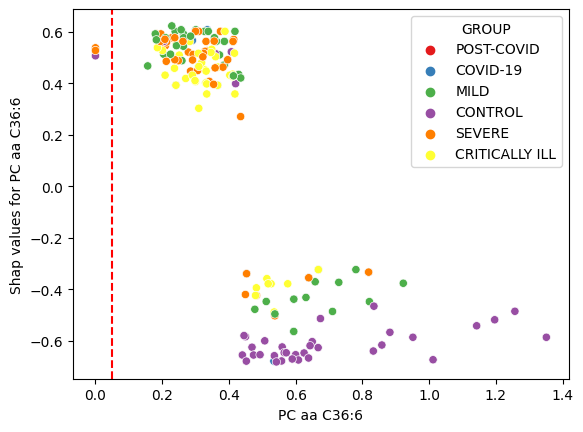

In [ ]:
string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))

In [ ]:
shap_values.shape

(180, 111)

In [ ]:
m_ctrl_vs_covid

Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
CV19-0007A         46.385542              3.851852             0.781818   
CV19-0071A         43.375000              3.500000             3.745283   
CV19-0079A         79.741379              6.798030             2.066667   
CV19-0118A         32.037815              1.931034             2.058824   
CV19-0125A         39.357430              2.014085             4.863813   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
CV19-0007A                0.086000       166.0    230.0      236   117.0   
CV19-0071A                0.047414        67.0    233.0      343    89.2   
CV19-0079A                0.031845        69.2    250.0      371   129.0   
CV19-0118A                0.029863        54.2    190.0      415   103.0   
CV19-0125A                0.041209        63.1    189.0      373    94.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Hydroxybutyrylcarnitine  Octanoylcarnitine  \
Folio                        ...                                               
CV19-0007A    151.0   170.0  ...                   0.2001             0.1216   
CV19-0071A    151.0   145.0  ...                   0.0741             0.2256   
CV19-0079A    175.0   207.0  ...                   0.0416             0.0951   
CV19-0118A    165.0   149.0  ...                   0.0291             0.2326   
CV19-0125A    167.0   158.0  ...                   0.0592             0.1857   
...             ...     ...  ...                      ...                ...   
CV19-0830A    125.0   245.0  ...                   0.1570             0.1348   
CV19-0833A    111.0   275.0  ...                   0.0738             0.2481   
CV19-0834A    206.0   247.0  ...                   0.1481             0.2395   
CV19-0932A    219.0   552.0  ...                   1.0753             0.3273   
CV19-0936A     89.5   273.0  ...                   0.0655             0.1934   

            Decadienylcarnitine  Decenoylcarnitine  Decanoylcarnitine  \
Folio                                                                   
CV19-0007A               0.0789             0.2072             0.2437   
CV19-0071A               0.0695             0.2310             0.3679   
CV19-0079A               0.0996             0.1439             0.1661   
CV19-0118A               0.0705             0.2509             0.3039   
CV19-0125A               0.0709             0.2856             0.3549   
...                         ...                ...                ...   
CV19-0830A               0.1569             0.2186             0.4441   
CV19-0833A               0.1557             0.3837             0.6554   
CV19-0834A               0.1776             0.3464             0.3441   
CV19-0932A               0.1791             0.4793             0.5729   
CV19-0936A               0.1900             0.2726             0.3561   

            Dodecenoylcarnitine  Dodecanoylcarnitine  He

##shap-UMAP

In [ ]:
from umap import UMAP
model = UMAP(n_components = 2,  verbose = 2, metric='euclidean',random_state=10,n_neighbors=15,n_epochs=500)
umap_2d = model.fit_transform(shap_values)
CONTI_DF = pd.DataFrame(umap_2d,columns=['UMAP1','UMAP2'],index=m_ctrl_vs_covid.index)


UMAP(n_epochs=500, random_state=10, verbose=2)
Tue Nov 14 18:08:13 2023 Construct fuzzy simplicial set
Tue Nov 14 18:08:14 2023 Finding Nearest Neighbors
Tue Nov 14 18:08:17 2023 Finished Nearest Neighbor Search
Tue Nov 14 18:08:21 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Nov 14 18:08:23 2023 Finished embedding


In [ ]:
CONTI_DF

UMAP1     UMAP2
Folio                         
CV19-0007A  7.958226  9.282611
CV19-0071A  8.260445  9.149925
CV19-0079A  9.611006  9.227842
CV19-0118A  8.991693  8.712564
CV19-0125A  8.684319  9.223824
...              ...       ...
CV19-0830A  6.027842  8.350374
CV19-0833A  6.145915  3.461604
CV19-0834A  7.545600  2.892261
CV19-0932A  6.435906  2.487850
CV19-0936A  7.479891  2.632884

[180 rows x 2 columns]

In [ ]:
m_ctrl_vs_covid = matrix[labels['GROUP2'] != "POST-COVID"]
l_ctrl_vs_covid =labels[labels['GROUP2'] != "POST-COVID"]

In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=l_ctrl_vs_covid['GROUP'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
CONTI_DF

UMAP1     UMAP2
Folio                         
CV19-0007A  7.958226  9.282611
CV19-0071A  8.260445  9.149925
CV19-0079A  9.611006  9.227842
CV19-0118A  8.991693  8.712564
CV19-0125A  8.684319  9.223824
...              ...       ...
CV19-0830A  6.027842  8.350374
CV19-0833A  6.145915  3.461604
CV19-0834A  7.545600  2.892261
CV19-0932A  6.435906  2.487850
CV19-0936A  7.479891  2.632884

[180 rows x 2 columns]

In [ ]:
CONTI_DF.to_csv('umap_hdbscan.csv')

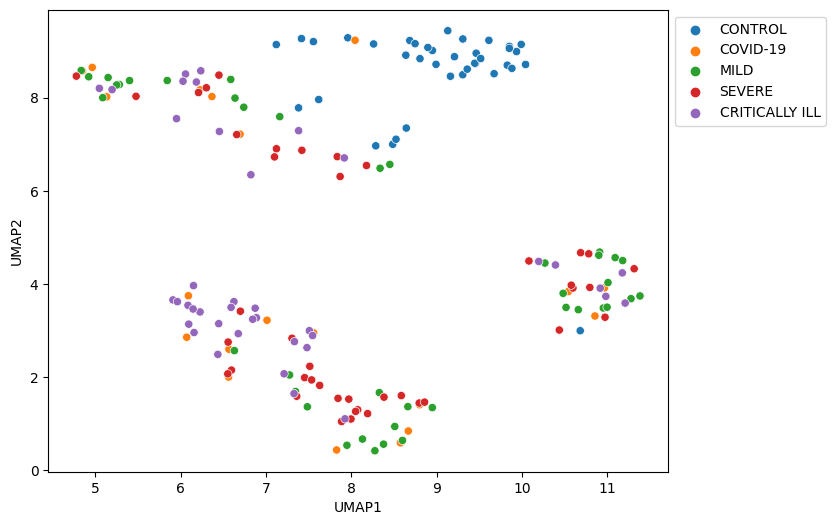

In [ ]:
# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=l_ctrl_vs_covid['GROUP'], legend='full')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=l_ctrl_vs_covid['GROUP2'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

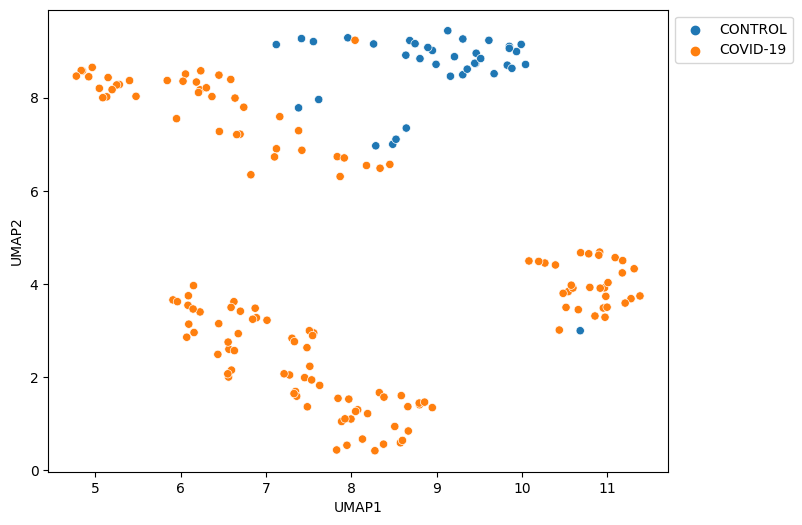

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=l_ctrl_vs_covid['GROUP2'], legend='full')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
shaps  = pd.DataFrame(shap_values, columns= m_ctrl_vs_covid.columns,index=m_ctrl_vs_covid.index)

<ipython-input-166-eb477c76421f>:21: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



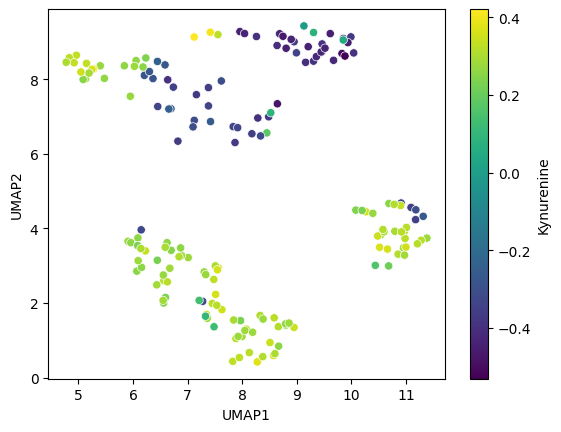

In [ ]:

# Create a scatter plot with a continuous color scale
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=shaps['Kynurenine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')



# Get the color values for the scatter plot
color_values = shaps['Kynurenine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Kynurenine')

# Show the plot
plt.show()
# Show the plot
plt.show()


<ipython-input-167-4480e88c9cca>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



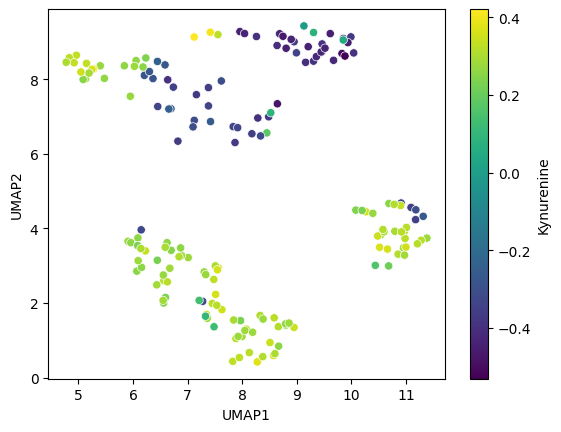

In [ ]:


# Create a scatter plot with a continuous color scale
scatter_plot = sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=shaps['Kynurenine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Get the color values for the scatter plot
color_values = shaps['Kynurenine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Kynurenine')

# Show the plot
plt.show()



In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=shaps['Kynurenine'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
CONTI_DF

UMAP1     UMAP2
Folio                         
CV19-0007A  7.958226  9.282611
CV19-0071A  8.260445  9.149925
CV19-0079A  9.611006  9.227842
CV19-0118A  8.991693  8.712564
CV19-0125A  8.684319  9.223824
...              ...       ...
CV19-0830A  6.027842  8.350374
CV19-0833A  6.145915  3.461604
CV19-0834A  7.545600  2.892261
CV19-0932A  6.435906  2.487850
CV19-0936A  7.479891  2.632884

[180 rows x 2 columns]

In [ ]:
from umap import UMAP
model = UMAP(n_components = 50,  verbose = 2, metric='euclidean',
             random_state=10,n_neighbors=15,n_epochs=3000,min_dist=0.001)
umap_2d = model.fit_transform(shap_values)
CONTI_DF_1 = pd.DataFrame(umap_2d,index=m_ctrl_vs_covid.index)

import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,cluster_selection_method='leaf', min_samples=5)
clusterer.fit(CONTI_DF_1)
labels = clusterer.labels_


UMAP(min_dist=0.001, n_components=50, n_epochs=3000, random_state=10, verbose=2)
Tue Nov 14 18:09:04 2023 Construct fuzzy simplicial set
Tue Nov 14 18:09:04 2023 Finding Nearest Neighbors
Tue Nov 14 18:09:04 2023 Finished Nearest Neighbor Search
Tue Nov 14 18:09:04 2023 Construct embedding


Epochs completed:   0%|            0/3000 [00:00]

Tue Nov 14 18:09:15 2023 Finished embedding


In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=labels)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

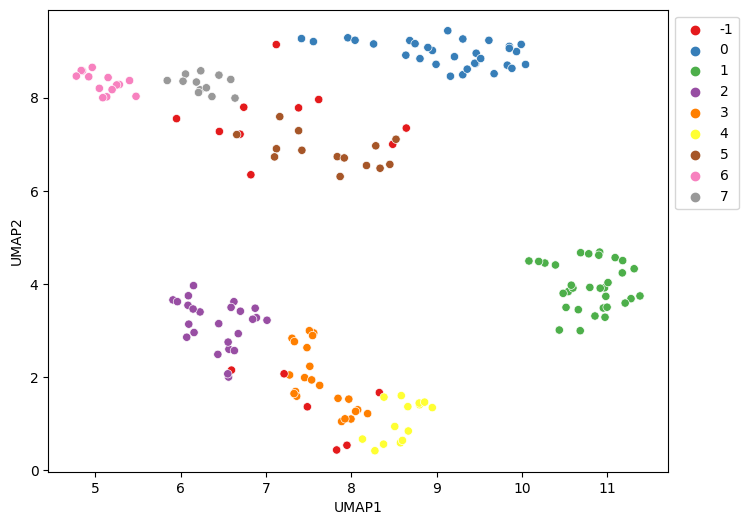

In [ ]:
# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=labels, legend='full',palette='Set1')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

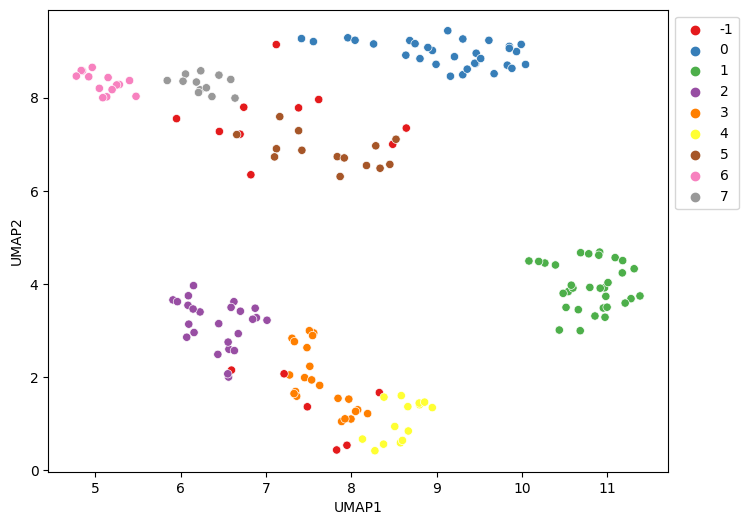

In [ ]:
# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=labels, legend='full', palette='Set1')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save the plot with higher resolution
plt.savefig('scatter_plot.png', dpi=600, bbox_inches='tight')  # Adjust the file name and format as desired

# Show the plot
plt.show()

In [ ]:

CONTI_DF['hdbscan']  = labels

In [ ]:
CONTI_DF

UMAP1     UMAP2  hdbscan
Folio                                  
CV19-0007A  7.958226  9.282611        0
CV19-0071A  8.260445  9.149925        0
CV19-0079A  9.611006  9.227842        0
CV19-0118A  8.991693  8.712564        0
CV19-0125A  8.684319  9.223824        0
...              ...       ...      ...
CV19-0830A  6.027842  8.350374        7
CV19-0833A  6.145915  3.461604        2
CV19-0834A  7.545600  2.892261        3
CV19-0932A  6.435906  2.487850        2
CV19-0936A  7.479891  2.632884        3

[180 rows x 3 columns]

In [ ]:
m_ctrl_vs_covid_HDBSCAN = m_ctrl_vs_covid[labels != -1]
m_ctrl_vs_covid_HDBSCAN['hdbscan'] =labels[labels != -1]
m_ctrl_vs_covid_HDBSCAN

<ipython-input-32-1e9793b4218c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
CV19-0007A         46.385542              3.851852             0.781818   
CV19-0071A         43.375000              3.500000             3.745283   
CV19-0079A         79.741379              6.798030             2.066667   
CV19-0118A         32.037815              1.931034             2.058824   
CV19-0125A         39.357430              2.014085             4.863813   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
CV19-0007A                0.086000       166.0    230.0      236   117.0   
CV19-0071A                0.047414        67.0    233.0      343    89.2   
CV19-0079A                0.031845        69.2    250.0      371   129.0   
CV19-0118A                0.029863        54.2    190.0      415   103.0   
CV19-0125A                0.041209        63.1    189.0      373    94.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Octanoylcarnitine  Decadienylcarnitine  \
Folio                        ...                                           
CV19-0007A    151.0   170.0  ...             0.1216               0.0789   
CV19-0071A    151.0   145.0  ...             0.2256               0.0695   
CV19-0079A    175.0   207.0  ...             0.0951               0.0996   
CV19-0118A    165.0   149.0  ...             0.2326               0.0705   
CV19-0125A    167.0   158.0  ...             0.1857               0.0709   
...             ...     ...  ...                ...                  ...   
CV19-0830A    125.0   245.0  ...             0.1348               0.1569   
CV19-0833A    111.0   275.0  ...             0.2481               0.1557   
CV19-0834A    206.0   247.0  ...             0.2395               0.1776   
CV19-0932A    219.0   552.0  ...             0.3273               0.1791   
CV19-0936A     89.5   273.0  ...             0.1934               0.1900   

            Decenoylcarnitine  Decanoylcarnitine  Dodecenoylcarnitine  \
Folio                                                                   
CV19-0007A             0.2072             0.2437               0.1584   
CV19-0071A             0.2310             0.3679               0.1526   
CV19-0079A             0.1439             0.1661               0.0977   
CV19-0118A             0.2509             0.3039               0.1262   
CV19-0125A             0.2856             0.3549               0.1938   
...                       ...                ...                  ...   
CV19-0830A             0.2186             0.4441               0.1232   
CV19-0833A             0.3837             0.6554               0.1521   
CV19-0834A             0.3464             0.3441               0.2043   
CV19-0932A             0.4793             0.5729               0.2027   
CV19-0936A             0.2726             0.3561               0.0964   

            Dodecanoylcarnitine  Hexadecanoylcarnitine  \
Folio                                             

In [ ]:
m_ctrl_vs_covid_HDBSCAN.iloc[:,:-1]

Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
CV19-0007A         46.385542              3.851852             0.781818   
CV19-0071A         43.375000              3.500000             3.745283   
CV19-0079A         79.741379              6.798030             2.066667   
CV19-0118A         32.037815              1.931034             2.058824   
CV19-0125A         39.357430              2.014085             4.863813   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
CV19-0007A                0.086000       166.0    230.0      236   117.0   
CV19-0071A                0.047414        67.0    233.0      343    89.2   
CV19-0079A                0.031845        69.2    250.0      371   129.0   
CV19-0118A                0.029863        54.2    190.0      415   103.0   
CV19-0125A                0.041209        63.1    189.0      373    94.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Hydroxybutyrylcarnitine  Octanoylcarnitine  \
Folio                        ...                                               
CV19-0007A    151.0   170.0  ...                   0.2001             0.1216   
CV19-0071A    151.0   145.0  ...                   0.0741             0.2256   
CV19-0079A    175.0   207.0  ...                   0.0416             0.0951   
CV19-0118A    165.0   149.0  ...                   0.0291             0.2326   
CV19-0125A    167.0   158.0  ...                   0.0592             0.1857   
...             ...     ...  ...                      ...                ...   
CV19-0830A    125.0   245.0  ...                   0.1570             0.1348   
CV19-0833A    111.0   275.0  ...                   0.0738             0.2481   
CV19-0834A    206.0   247.0  ...                   0.1481             0.2395   
CV19-0932A    219.0   552.0  ...                   1.0753             0.3273   
CV19-0936A     89.5   273.0  ...                   0.0655             0.1934   

            Decadienylcarnitine  Decenoylcarnitine  Decanoylcarnitine  \
Folio                                                                   
CV19-0007A               0.0789             0.2072             0.2437   
CV19-0071A               0.0695             0.2310             0.3679   
CV19-0079A               0.0996             0.1439             0.1661   
CV19-0118A               0.0705             0.2509             0.3039   
CV19-0125A               0.0709             0.2856             0.3549   
...                         ...                ...                ...   
CV19-0830A               0.1569             0.2186             0.4441   
CV19-0833A               0.1557             0.3837             0.6554   
CV19-0834A               0.1776             0.3464             0.3441   
CV19-0932A               0.1791             0.4793             0.5729   
CV19-0936A               0.1900             0.2726             0.3561   

            Dodecenoylcarnitine  Dodecanoylcarnitine  He

In [ ]:
m_ctrl_vs_covid_HDBSCAN['hdbscan']

Folio
CV19-0007A    0
CV19-0071A    0
CV19-0079A    0
CV19-0118A    0
CV19-0125A    0
             ..
CV19-0830A    7
CV19-0833A    2
CV19-0834A    3
CV19-0932A    2
CV19-0936A    3
Name: hdbscan, Length: 164, dtype: int64

In [ ]:
X=m_ctrl_vs_covid_HDBSCAN.iloc[:,:-1]
y= m_ctrl_vs_covid_HDBSCAN['hdbscan'].values

"""
# Step 2: Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the parameter distribution for random search
param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': randint(100, 501),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
# Step 4: Create an XGBoost classifier
model = xgb.XGBClassifier()

# Step 5: Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5,random_state=42)
random_search.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Set Score: ", random_search.score(X_test, y_test))
"""

'\n# Step 2: Split the data into training and test sets\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Step 3: Define the parameter distribution for random search\nparam_dist = {\n    \'max_depth\': randint(3, 7),\n    \'learning_rate\': [0.1, 0.01, 0.001, 0.0001],\n    \'n_estimators\': randint(100, 501),\n    \'subsample\': uniform(0.4, 0.6),\n    \'colsample_bytree\': uniform(0.4, 0.6),\n    \'gamma\': [0, 0.1, 0.2, 0.3, 0.4, 0.5],\n    \'reg_alpha\': [0, 0.1, 0.5, 1],\n    \'reg_lambda\': [0, 0.1, 0.5, 1]\n}\n# Step 4: Create an XGBoost classifier\nmodel = xgb.XGBClassifier()\n\n# Step 5: Perform random search\nrandom_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5,random_state=42)\nrandom_search.fit(X_train, y_train)\n\n# Step 6: Print the best hyperparameters and evaluation scores\nprint("Best Hyperparameters: ", random_search.best_params_)\nprint("Best Score: ", random_search.best_sc

In [ ]:
best_params_=  {'colsample_bytree': 0.8108387035323276, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 134, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.9698799479751544}
#Best Hyperparameters:  {'colsample_bytree': 0.8108387035323276, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 134, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.9698799479751544}
#Best Score:  0.8024615384615383
#Test Set Score:  0.9375

In [ ]:
X = m_ctrl_vs_covid_HDBSCAN.iloc[:,:-1]
y = m_ctrl_vs_covid_HDBSCAN['hdbscan'].values

#Create an XGBoost classifier with early stopping
model = xgb.XGBClassifier(**best_params_)
model.fit(X, y)

#Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [ ]:
# Assuming you have a NumPy array named "arr"
with open('hdbscan_ctrl_covid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))

In [1]:
shap.summary_plot(shap_values, X)

NameError: name 'shap' is not defined

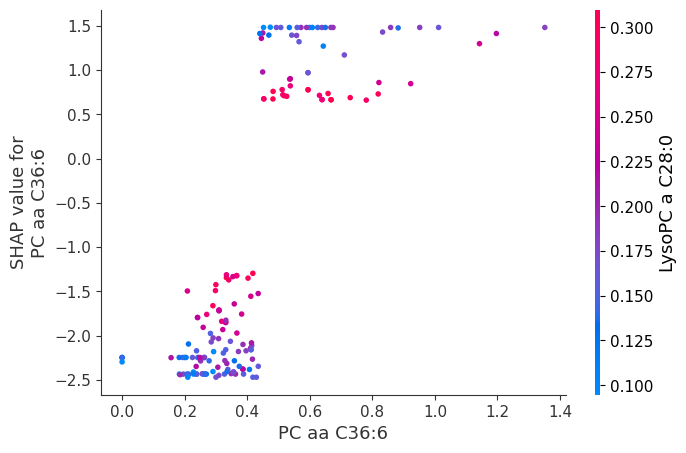

In [ ]:
shap.dependence_plot('PC aa C36:6', shap_values[0], X, interaction_index="LysoPC a C28:0")

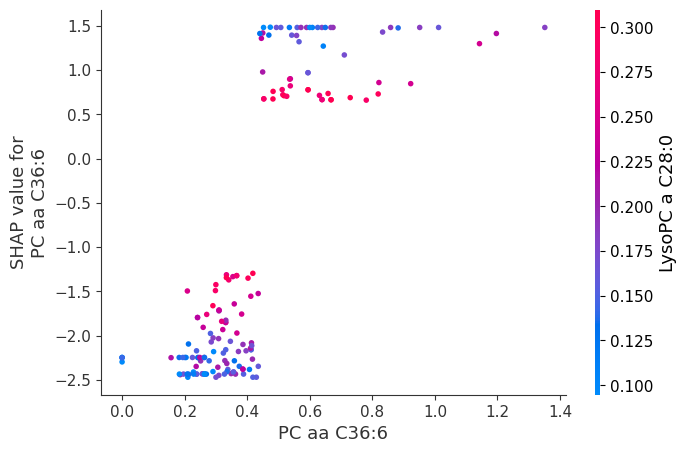

In [ ]:
shap.dependence_plot('PC aa C36:6', shap_values[0], X, interaction_index="LysoPC a C28:0")

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['PC aa C36:6']

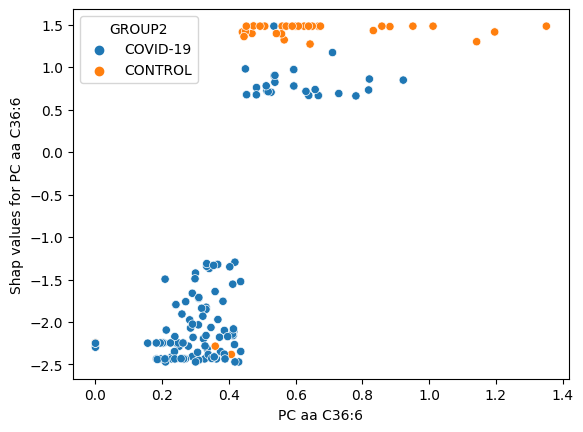

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['PC aa C36:6']

import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=l_ctrl_vs_covid['GROUP2'])

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Show the plot
plt.show()

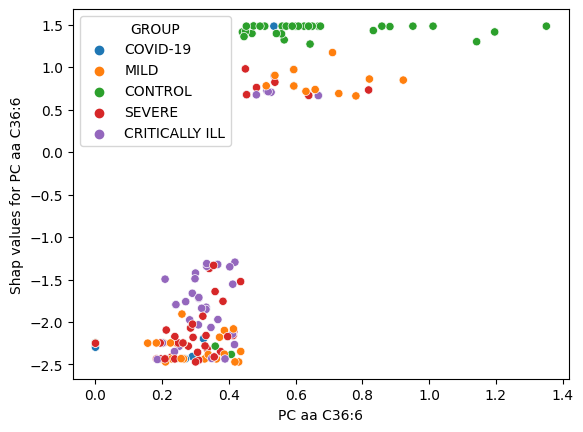

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=l_ctrl_vs_covid['GROUP'])

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Show the plot
plt.show()

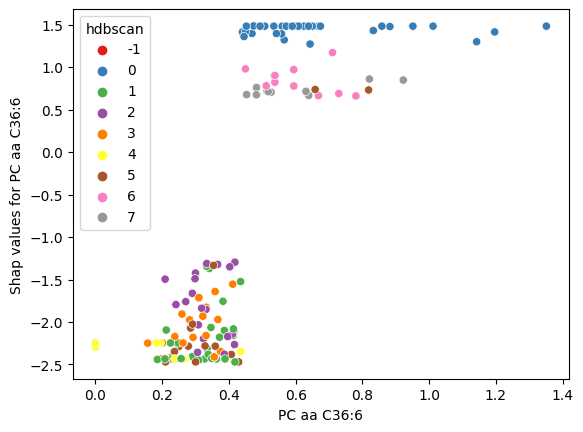

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Show the plot
plt.show()



/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



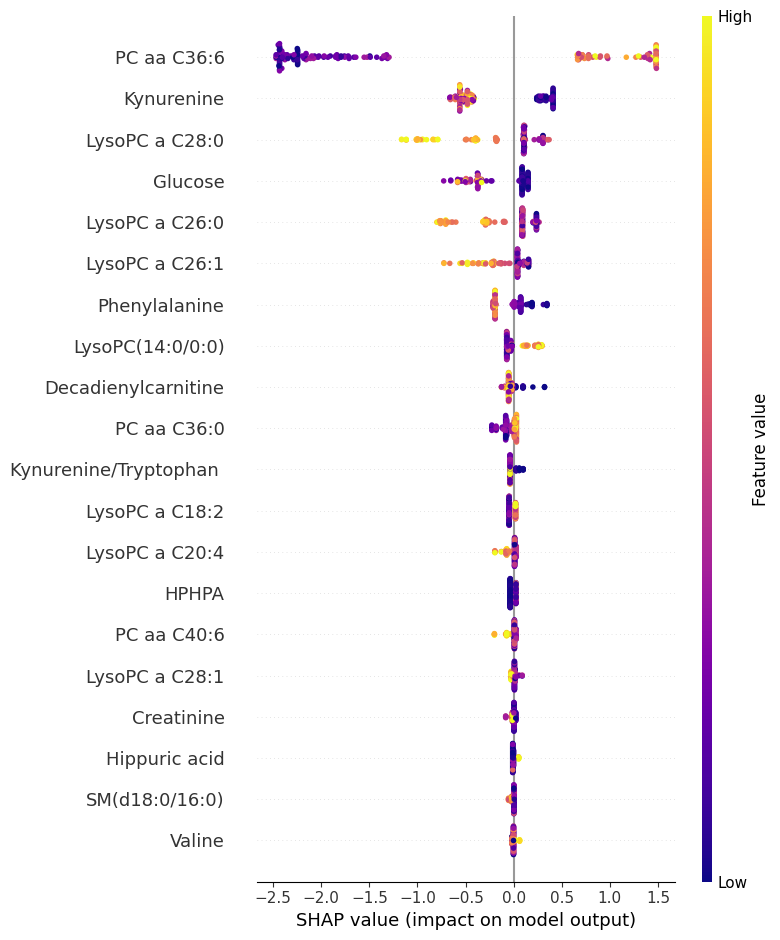

In [ ]:
shap.summary_plot(shap_values[0], X,cmap = "plasma")

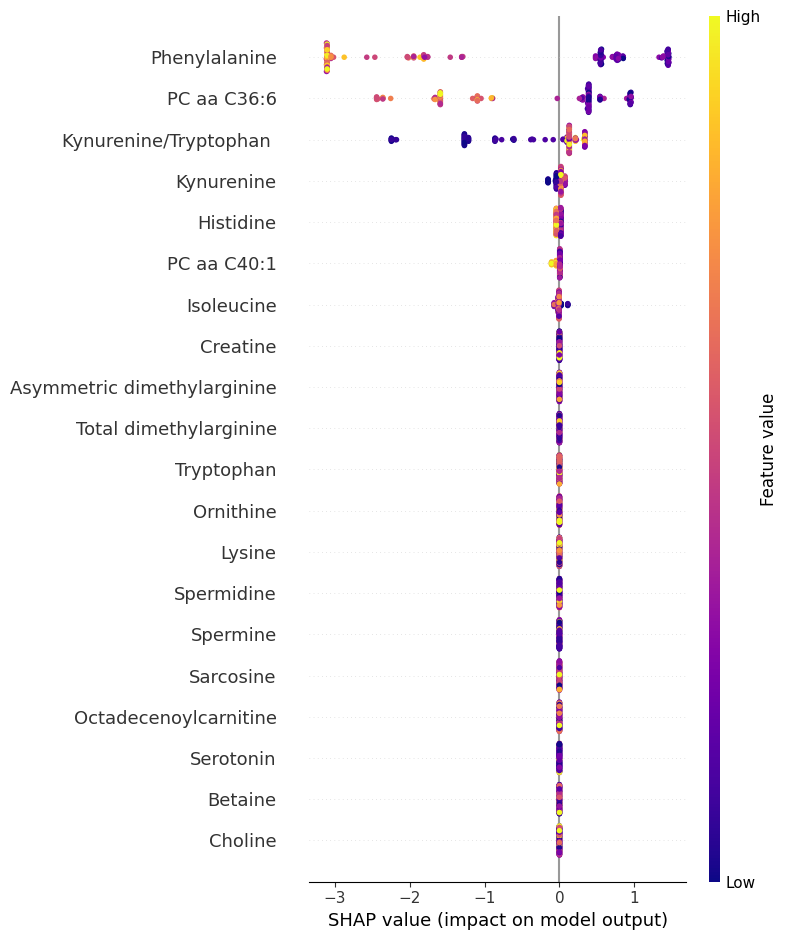

In [ ]:
shap.summary_plot(shap_values[1], X,cmap = "plasma")

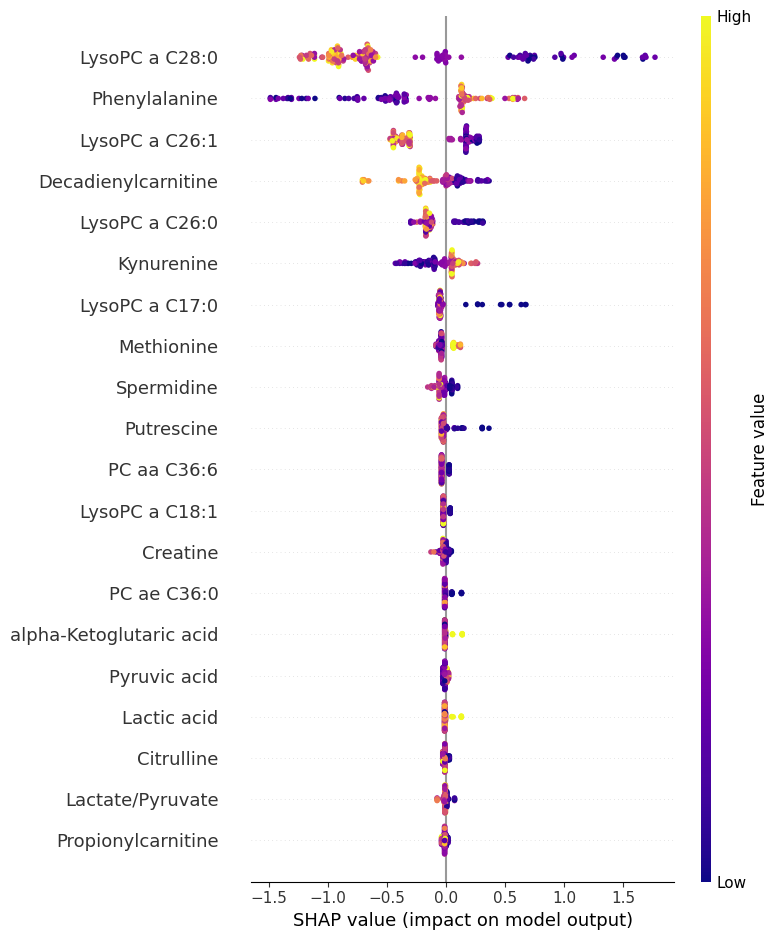

In [ ]:
shap.summary_plot(shap_values[4], X,cmap = "plasma")

In [ ]:
probabilities = clusterer.probabilities_
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=probabilities)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

#RULES FOR CHARECTERIZATION

#CLUSTER 0

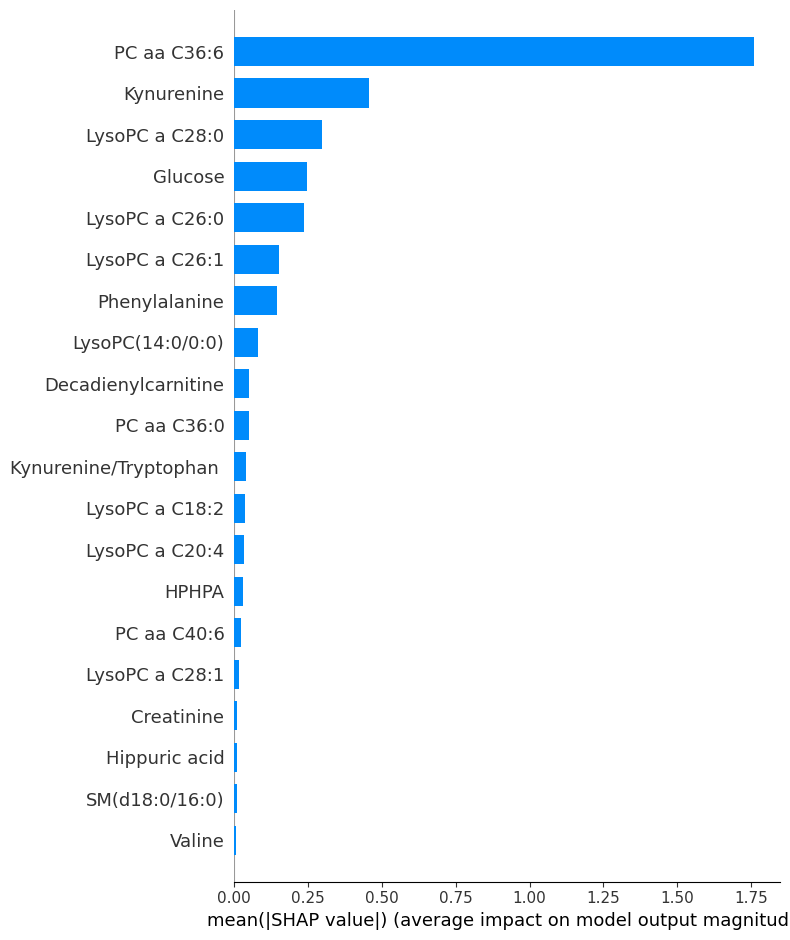

In [ ]:
shap.summary_plot(shap_values[0], X,plot_type='bar')


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



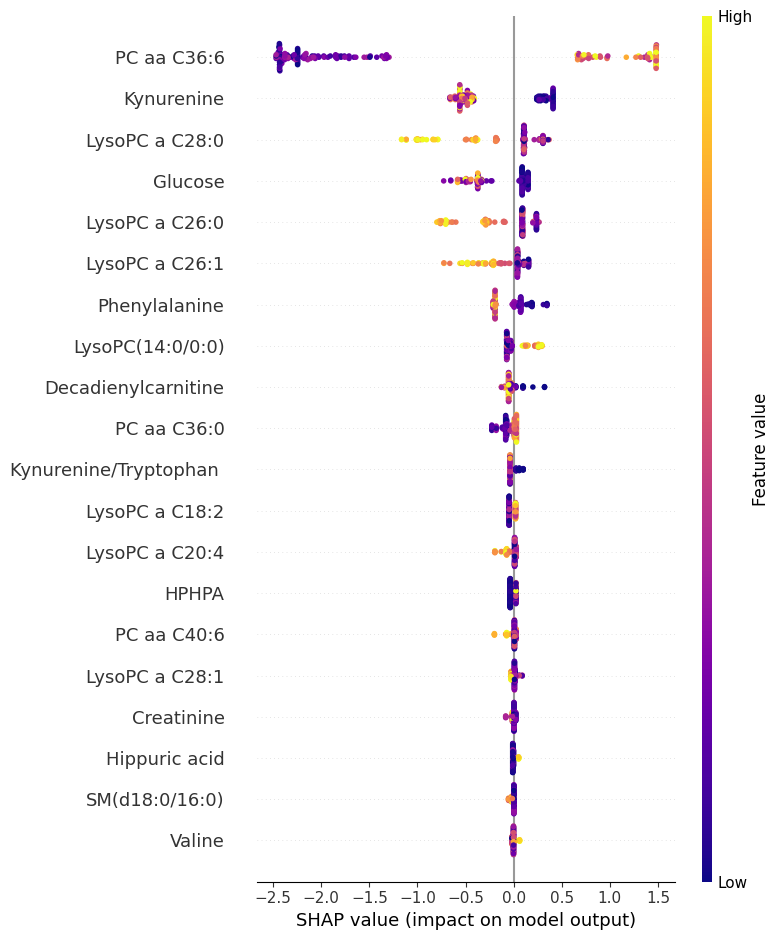

In [ ]:
shap.summary_plot(shap_values[0], X,cmap = "plasma")

#LysoPC a C26:1
#LysoPC a C28:0
#Kynurenine/Trytophan

In [ ]:
CONTI_DF[CONTI_DF['hdbscan'] !=-1]['hdbscan']

Folio
CV19-0007A    0
CV19-0071A    0
CV19-0079A    0
CV19-0118A    0
CV19-0125A    0
             ..
CV19-0830A    7
CV19-0833A    2
CV19-0834A    3
CV19-0932A    2
CV19-0936A    3
Name: hdbscan, Length: 164, dtype: int64

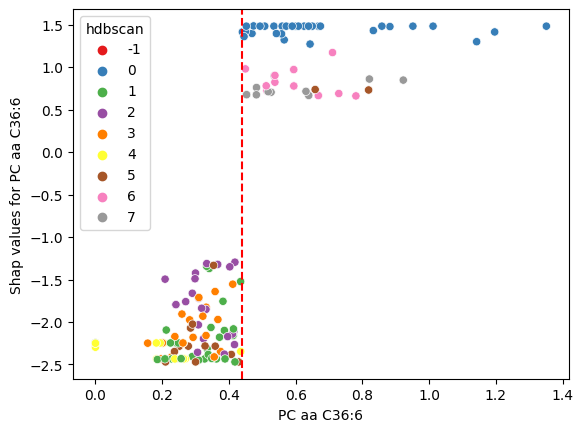

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Draw a vertical line
x_value = 0.44  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


In [ ]:
#LysoPC a C26:1
#LysoPC a C28:0
#Kynurenine/Trytophan
#Kynurenine
#Gluose

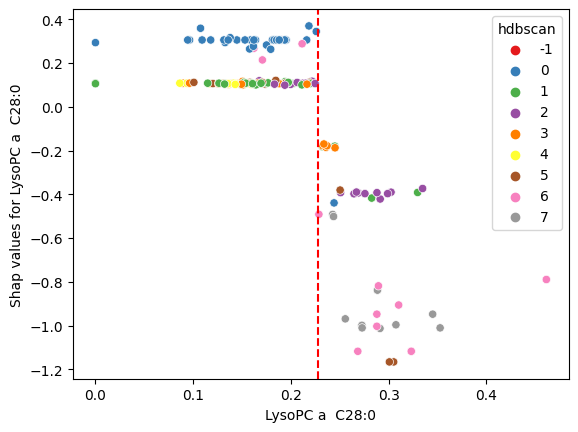

In [ ]:
xx= X['LysoPC a C28:0']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['LysoPC a C28:0']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('LysoPC a  C28:0')
plt.ylabel('Shap values for LysoPC a  C28:0')

# Draw a vertical line
x_value = 0.228  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


In [ ]:
X

Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
CV19-0007A         46.385542              3.851852             0.781818   
CV19-0071A         43.375000              3.500000             3.745283   
CV19-0079A         79.741379              6.798030             2.066667   
CV19-0118A         32.037815              1.931034             2.058824   
CV19-0125A         39.357430              2.014085             4.863813   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
CV19-0007A                0.086000       166.0    230.0      236   117.0   
CV19-0071A                0.047414        67.0    233.0      343    89.2   
CV19-0079A                0.031845        69.2    250.0      371   129.0   
CV19-0118A                0.029863        54.2    190.0      415   103.0   
CV19-0125A                0.041209        63.1    189.0      373    94.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Hydroxybutyrylcarnitine  Octanoylcarnitine  \
Folio                        ...                                               
CV19-0007A    151.0   170.0  ...                   0.2001             0.1216   
CV19-0071A    151.0   145.0  ...                   0.0741             0.2256   
CV19-0079A    175.0   207.0  ...                   0.0416             0.0951   
CV19-0118A    165.0   149.0  ...                   0.0291             0.2326   
CV19-0125A    167.0   158.0  ...                   0.0592             0.1857   
...             ...     ...  ...                      ...                ...   
CV19-0830A    125.0   245.0  ...                   0.1570             0.1348   
CV19-0833A    111.0   275.0  ...                   0.0738             0.2481   
CV19-0834A    206.0   247.0  ...                   0.1481             0.2395   
CV19-0932A    219.0   552.0  ...                   1.0753             0.3273   
CV19-0936A     89.5   273.0  ...                   0.0655             0.1934   

            Decadienylcarnitine  Decenoylcarnitine  Decanoylcarnitine  \
Folio                                                                   
CV19-0007A               0.0789             0.2072             0.2437   
CV19-0071A               0.0695             0.2310             0.3679   
CV19-0079A               0.0996             0.1439             0.1661   
CV19-0118A               0.0705             0.2509             0.3039   
CV19-0125A               0.0709             0.2856             0.3549   
...                         ...                ...                ...   
CV19-0830A               0.1569             0.2186             0.4441   
CV19-0833A               0.1557             0.3837             0.6554   
CV19-0834A               0.1776             0.3464             0.3441   
CV19-0932A               0.1791             0.4793             0.5729   
CV19-0936A               0.1900             0.2726             0.3561   

            Dodecenoylcarnitine  Dodecanoylcarnitine  He

In [ ]:
X.columns

Index(['Lactate/Pyruvate', 'Ornithine/Citrulline', 'Glutamine/Glutamate',
       'Kynurenine/Tryptophan ', 'Creatinine', 'Glycine', 'Alanine', 'Serine',
       'Proline', 'Valine',
       ...
       'Hydroxybutyrylcarnitine', 'Octanoylcarnitine', 'Decadienylcarnitine',
       'Decenoylcarnitine', 'Decanoylcarnitine', 'Dodecenoylcarnitine',
       'Dodecanoylcarnitine', 'Hexadecanoylcarnitine',
       'Octadecadienylcarnitine', 'Octadecenoylcarnitine'],
      dtype='object', length=111)

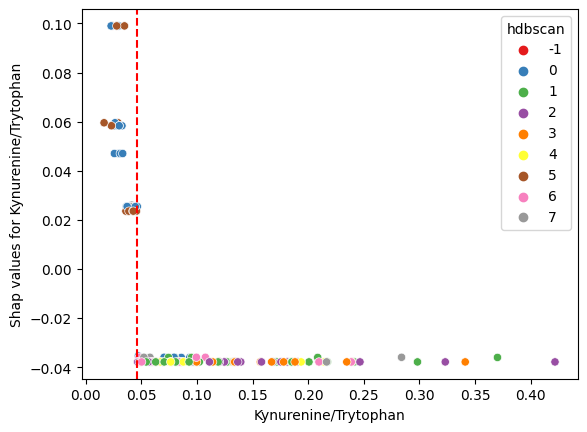

In [ ]:
xx= X['Kynurenine/Tryptophan ']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Kynurenine/Tryptophan ']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Kynurenine/Trytophan')
plt.ylabel('Shap values for Kynurenine/Trytophan')

# Draw a vertical line
x_value = 0.046  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

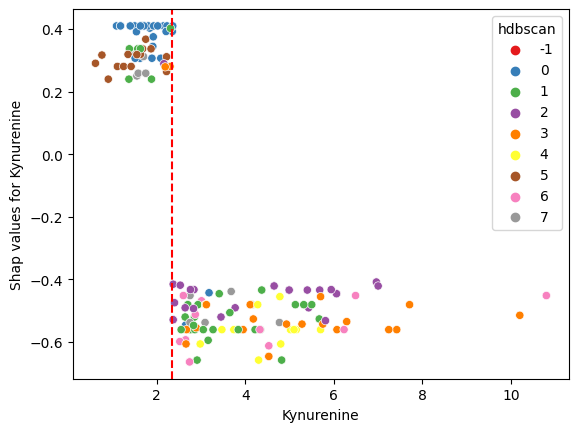

In [ ]:
xx= X['Kynurenine']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Kynurenine']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Kynurenine')
plt.ylabel('Shap values for Kynurenine')

# Draw a vertical line
x_value = 2.35  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


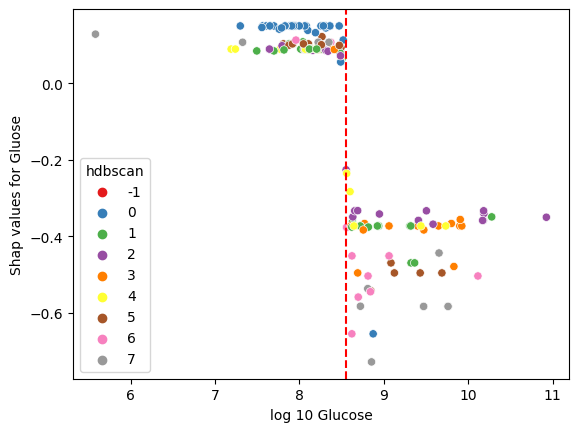

In [ ]:
xx= X['Glucose']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Glucose']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=np.log(xx), y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('log 10 Glucose')
plt.ylabel('Shap values for Gluose')

# Draw a vertical line
x_value = 8.55  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

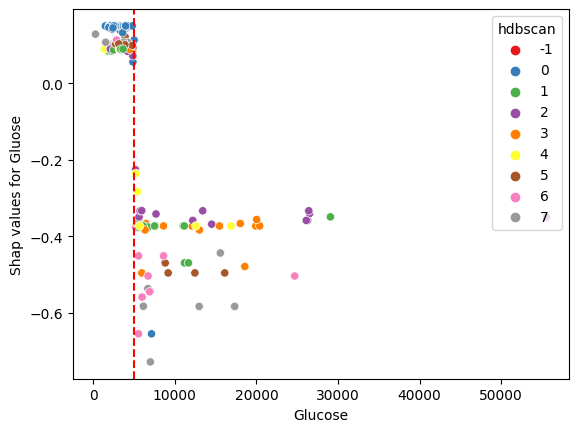

In [ ]:
xx= X['Glucose']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Glucose']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Shap values for Gluose')

# Draw a vertical line
x_value = 5000  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 1

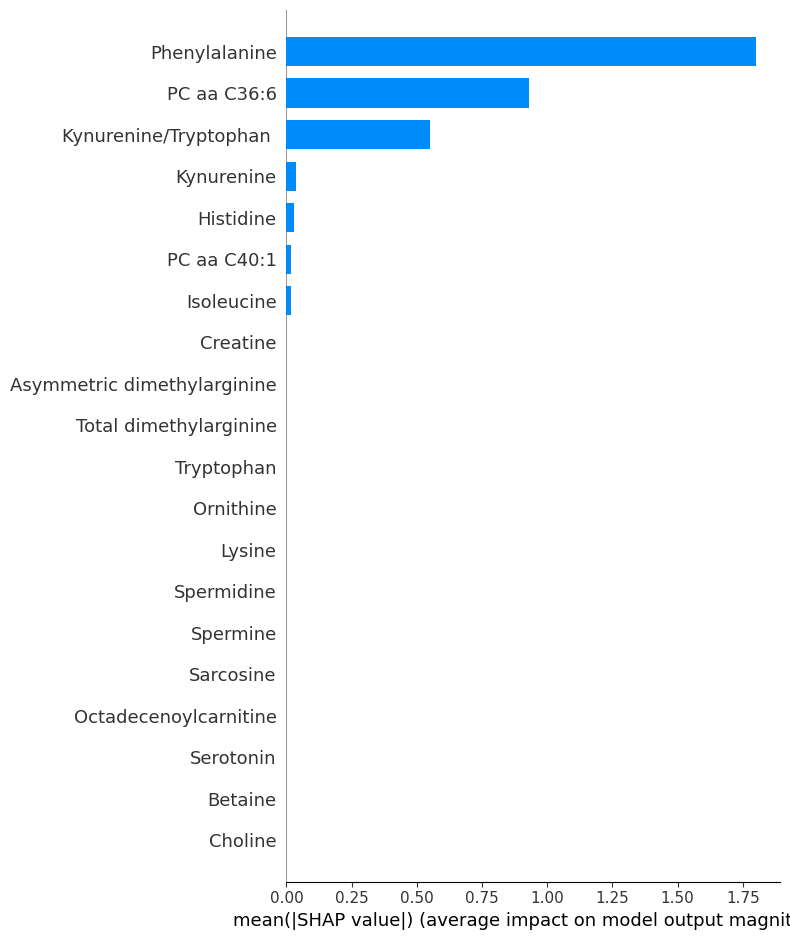

In [ ]:
shap.summary_plot(shap_values[1], X,plot_type='bar')


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



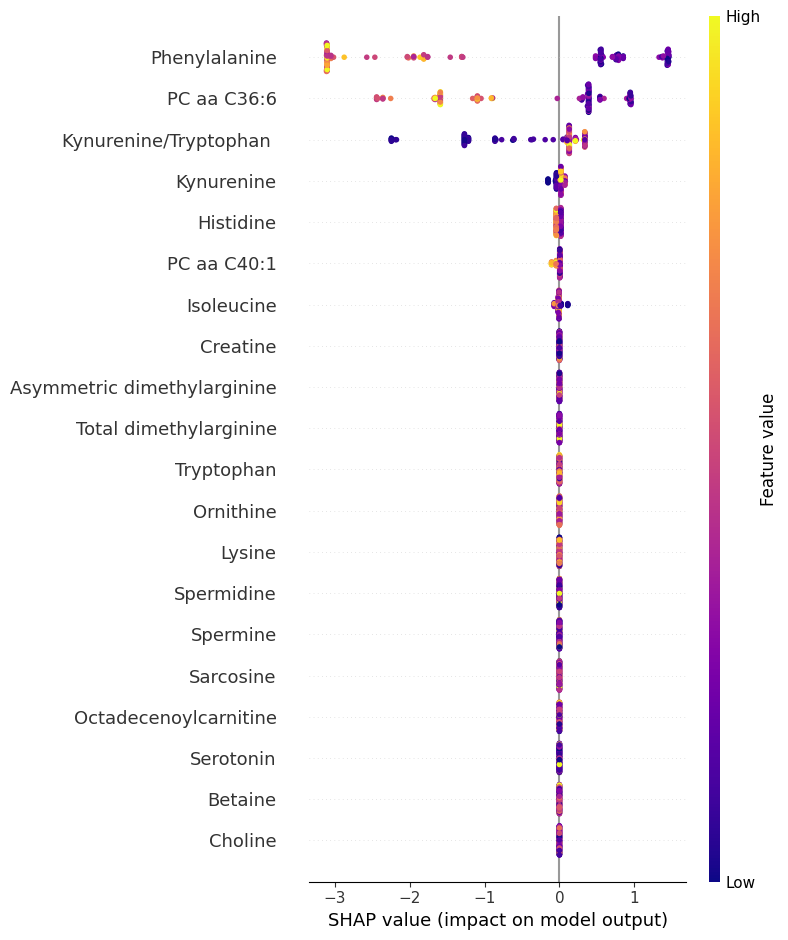

In [ ]:
shap.summary_plot(shap_values[1], X,cmap = "plasma")


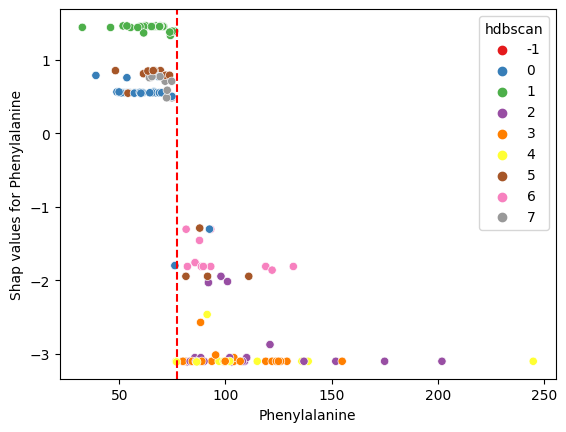

In [ ]:
xx= X['Phenylalanine']
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)['Phenylalanine']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Phenylalanine')
plt.ylabel('Shap values for Phenylalanine')

# Draw a vertical line
x_value = 77  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

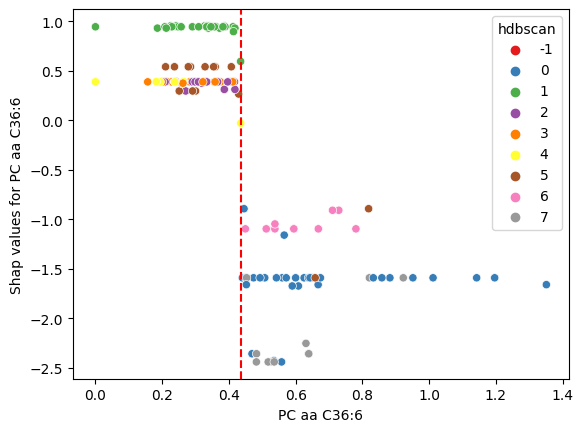

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Draw a vertical line
x_value = 0.435  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


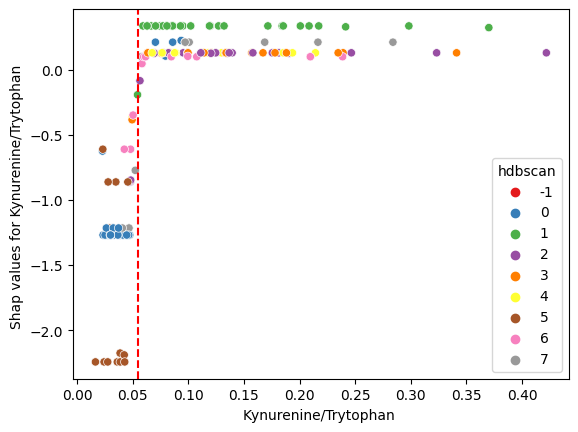

In [ ]:
xx= X['Kynurenine/Tryptophan ']
yy = pd.DataFrame(shap_values[1], columns=X.columns,index= X.index)['Kynurenine/Tryptophan ']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Kynurenine/Trytophan ')
plt.ylabel('Shap values for Kynurenine/Trytophan ')

# Draw a vertical line
x_value = 0.055  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

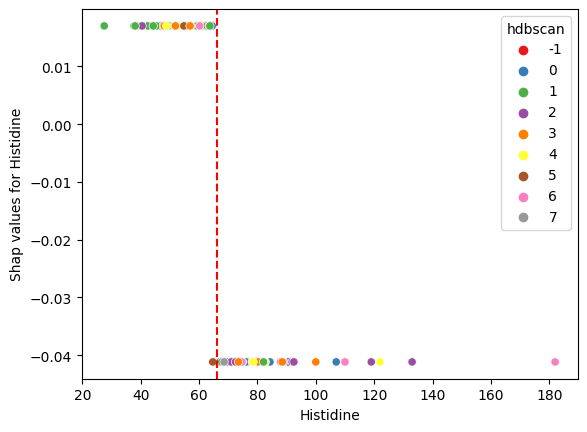

In [ ]:
xx= X['Histidine']
yy = pd.DataFrame(shap_values[1], columns=X.columns,index= X.index)['Histidine']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Histidine')
plt.ylabel('Shap values for Histidine')

# Draw a vertical line
x_value = 66  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

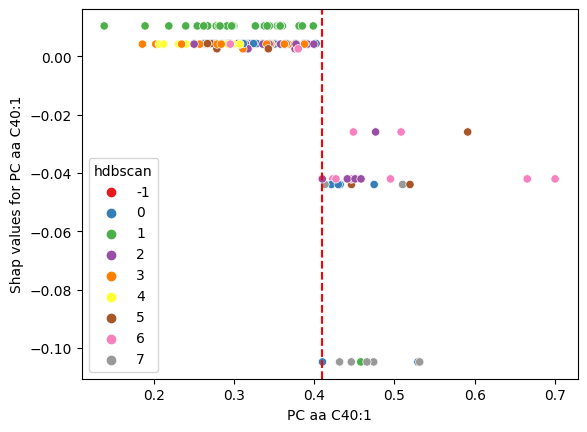

In [ ]:
xx= X['PC aa C40:1']
yy = pd.DataFrame(shap_values[1], columns=X.columns,index= X.index)['PC aa C40:1']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C40:1')
plt.ylabel('Shap values for PC aa C40:1')

# Draw a vertical line
x_value = 0.41  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#CLUSTER 2

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



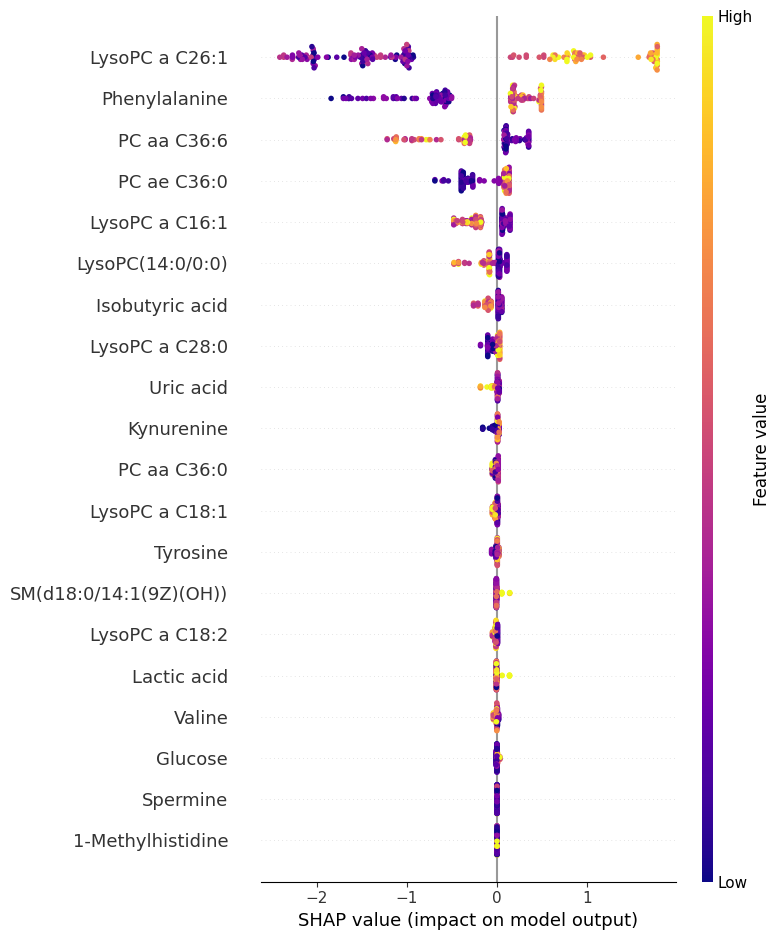

In [ ]:
shap.summary_plot(shap_values[2], X,cmap = "plasma")

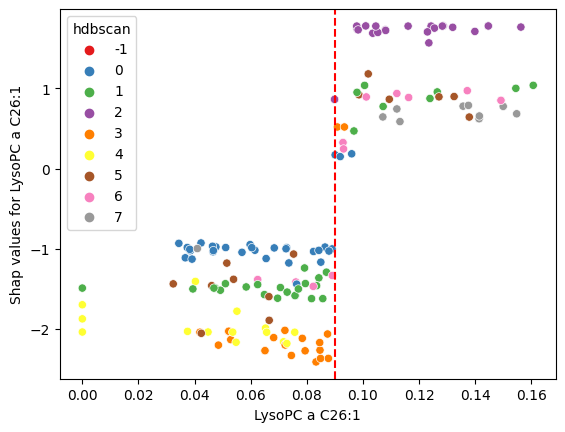

In [ ]:
xx= X['LysoPC a C26:1']
yy = pd.DataFrame(shap_values[2], columns=X.columns,index= X.index)['LysoPC a C26:1']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('LysoPC a C26:1')
plt.ylabel('Shap values for LysoPC a C26:1')

# Draw a vertical line
x_value = 0.09  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

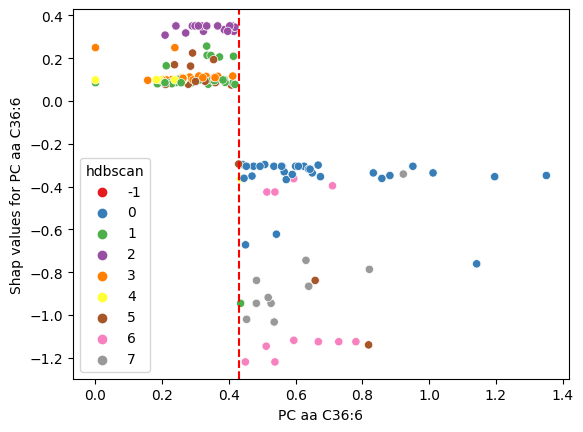

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Draw a vertical line
x_value = 0.43  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

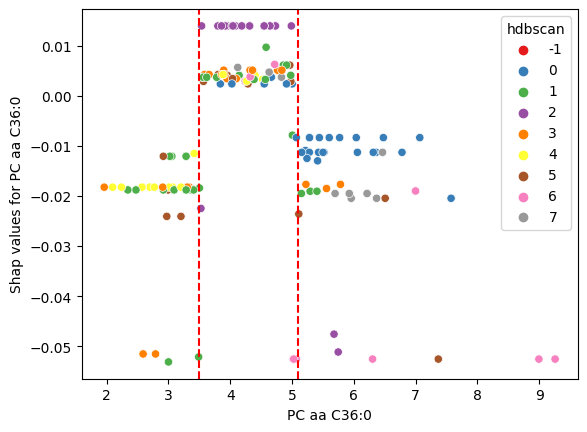

In [ ]:
xx= X['PC aa C36:0']
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)['PC aa C36:0']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('PC aa C36:0')
plt.ylabel('Shap values for PC aa C36:0')

# Draw a vertical line
x_value = 3.5 # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')
x_value = 5.1  # Set the x-axis valu1e for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#CLUSTER 3

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



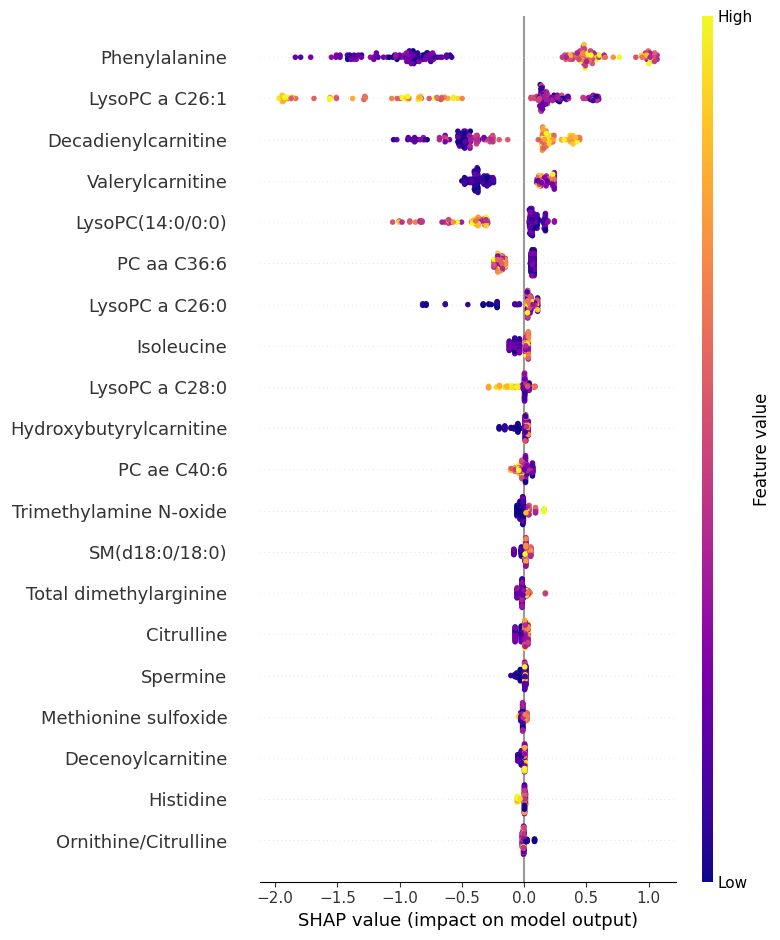

In [ ]:
shap.summary_plot(shap_values[3], X,cmap = "plasma")

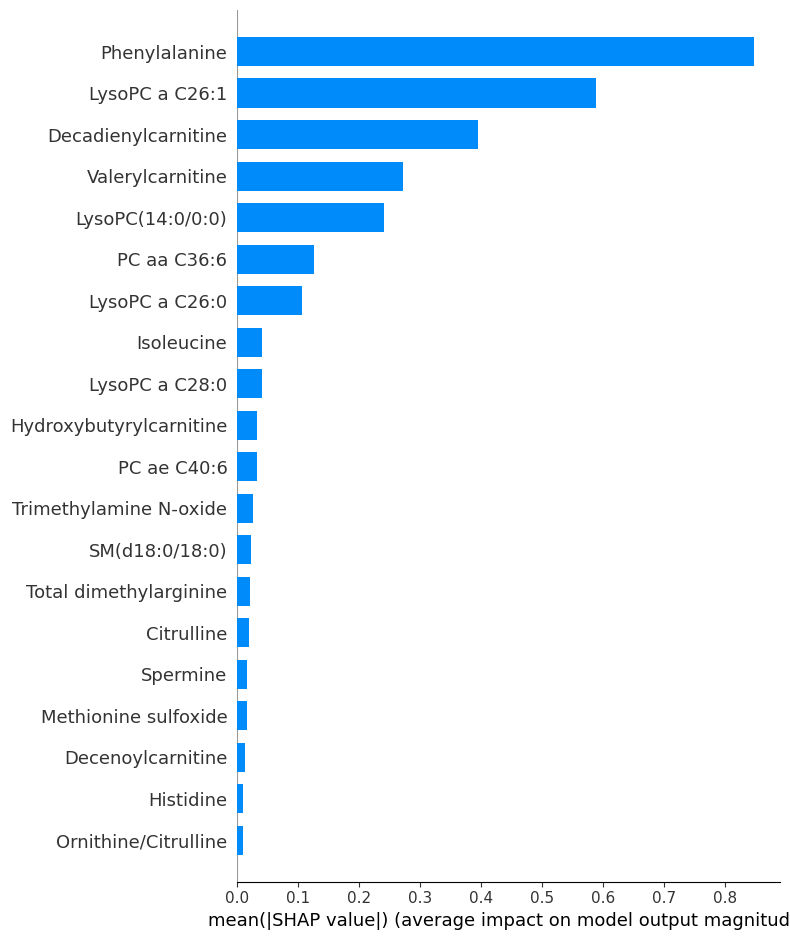

In [ ]:
shap.summary_plot(shap_values[3], X,plot_type='bar')

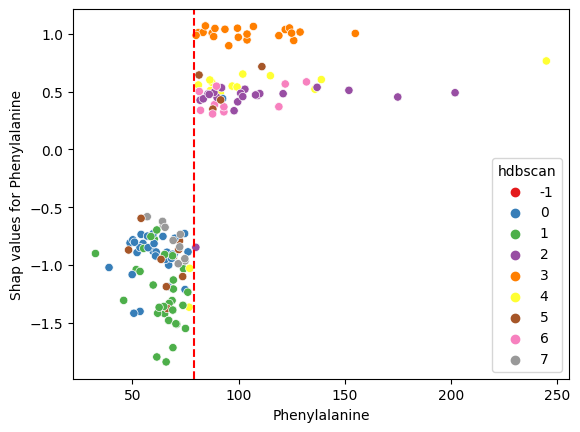

In [ ]:
xx= X['Phenylalanine']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['Phenylalanine']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Phenylalanine')
plt.ylabel('Shap values for Phenylalanine')

# Draw a vertical line
x_value = 79  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

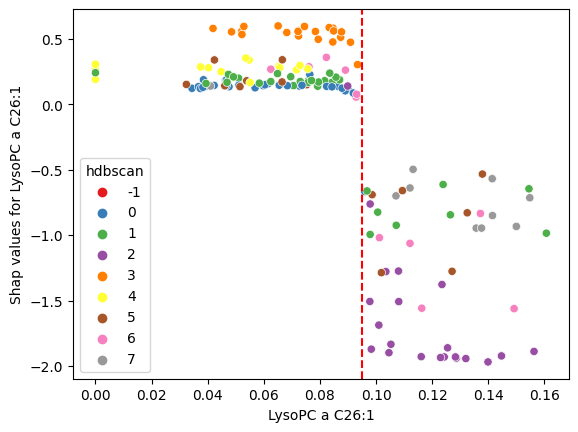

In [ ]:
xx= X['LysoPC a C26:1']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['LysoPC a C26:1']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('LysoPC a C26:1')
plt.ylabel('Shap values for LysoPC a C26:1')

# Draw a vertical line
x_value = 0.095  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

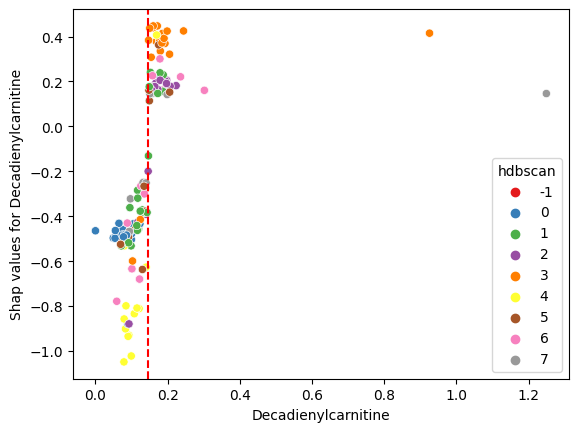

In [ ]:
xx= X['Decadienylcarnitine']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['Decadienylcarnitine']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('Decadienylcarnitine')
plt.ylabel('Shap values for Decadienylcarnitine')

# Draw a vertical line
x_value = 0.1465  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')


  # Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

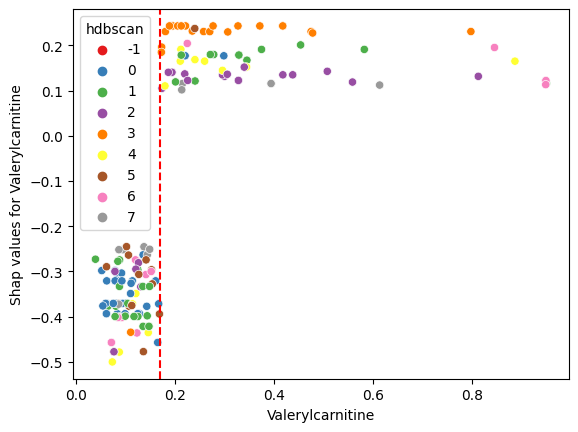

In [ ]:
xx= X['Valerylcarnitine']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['Valerylcarnitine']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('Valerylcarnitine')
plt.ylabel('Shap values for Valerylcarnitine')

# Draw a vertical line
x_value = 0.17  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')


# Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

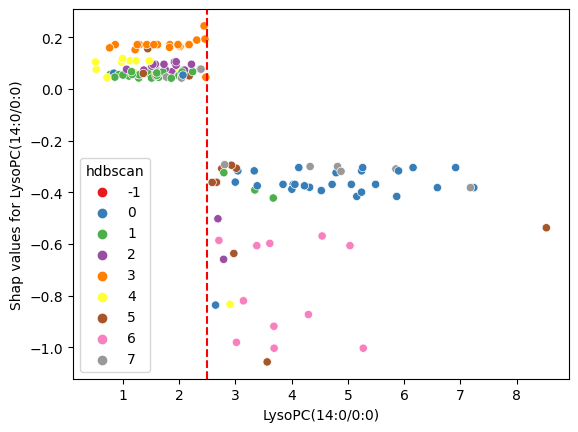

In [ ]:
xx= X['LysoPC(14:0/0:0)']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['LysoPC(14:0/0:0)']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('LysoPC(14:0/0:0)')
plt.ylabel('Shap values for LysoPC(14:0/0:0)')

# Draw a vertical line
x_value = 2.5  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')


# Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

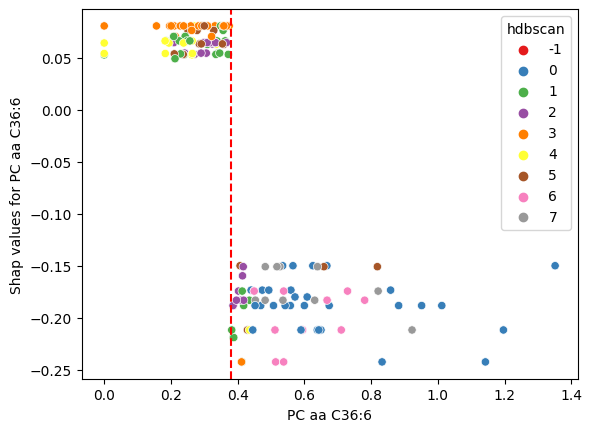

In [ ]:
xx= X['PC aa C36:6']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['PC aa C36:6']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('PC aa C36:6')
plt.ylabel('Shap values for PC aa C36:6')

# Draw a vertical line
x_value = 0.38  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

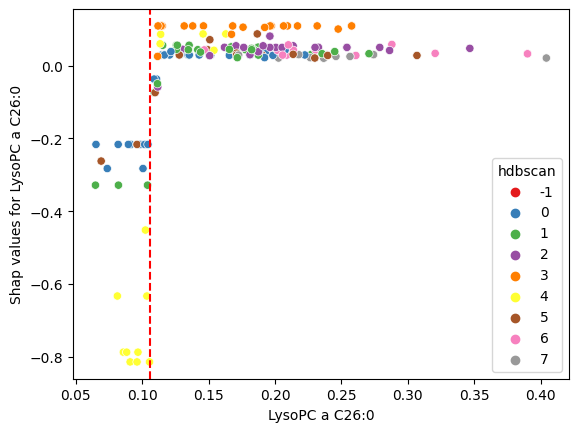

In [ ]:
xx= X['LysoPC a C26:0']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['LysoPC a C26:0']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('LysoPC a C26:0')
plt.ylabel('Shap values for LysoPC a C26:0')

# Draw a vertical line
x_value = 0.106  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

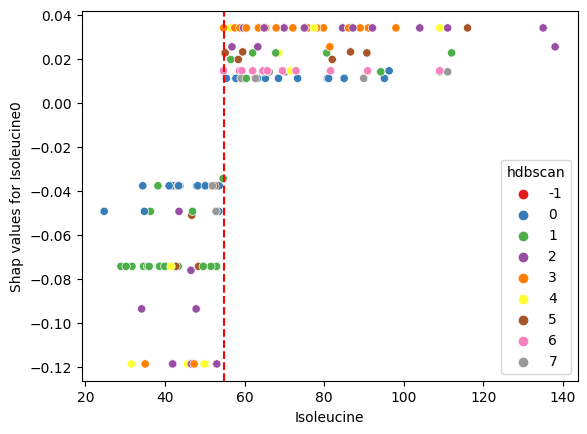

In [ ]:

xx= X['Isoleucine']
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)['Isoleucine']
import seaborn as sns
#plt.figure(figsize=(40, 6))  # Set the figure size

sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1')
# Set the figure size
# Add labels and title

plt.xlabel('Isoleucine')
plt.ylabel('Shap values for Isoleucine0')

# Draw a vertical line
x_value = 54.8  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Adjust the values (width, height) as per your preference

# Show the plot
plt.show()

#Cluster 4

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



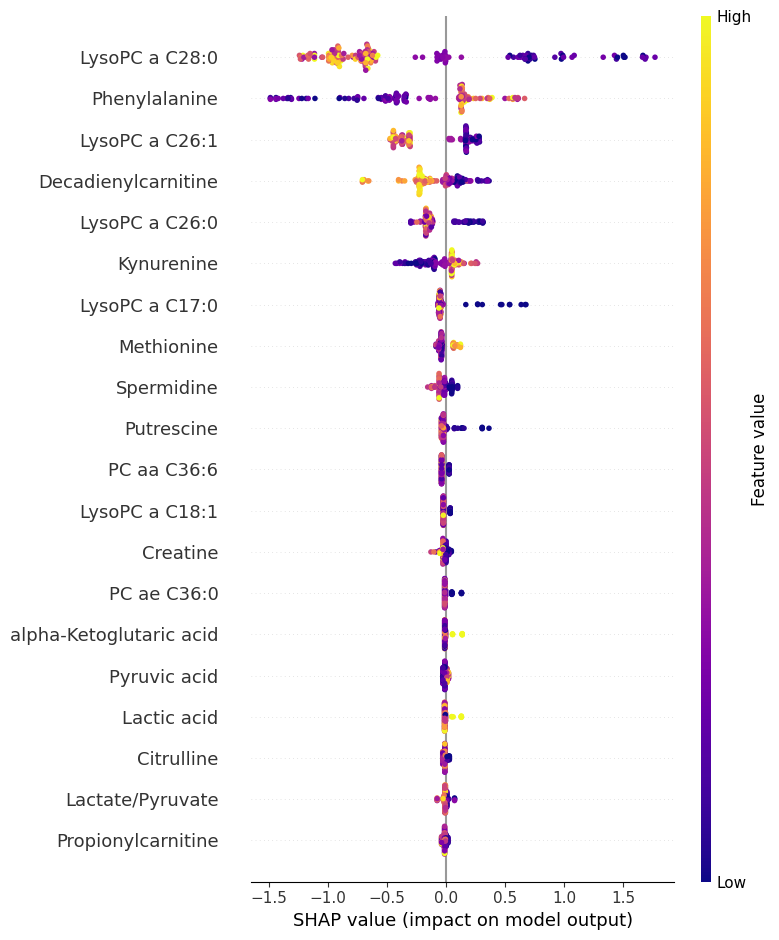

In [ ]:
shap.summary_plot(shap_values[4], X,cmap = "plasma")

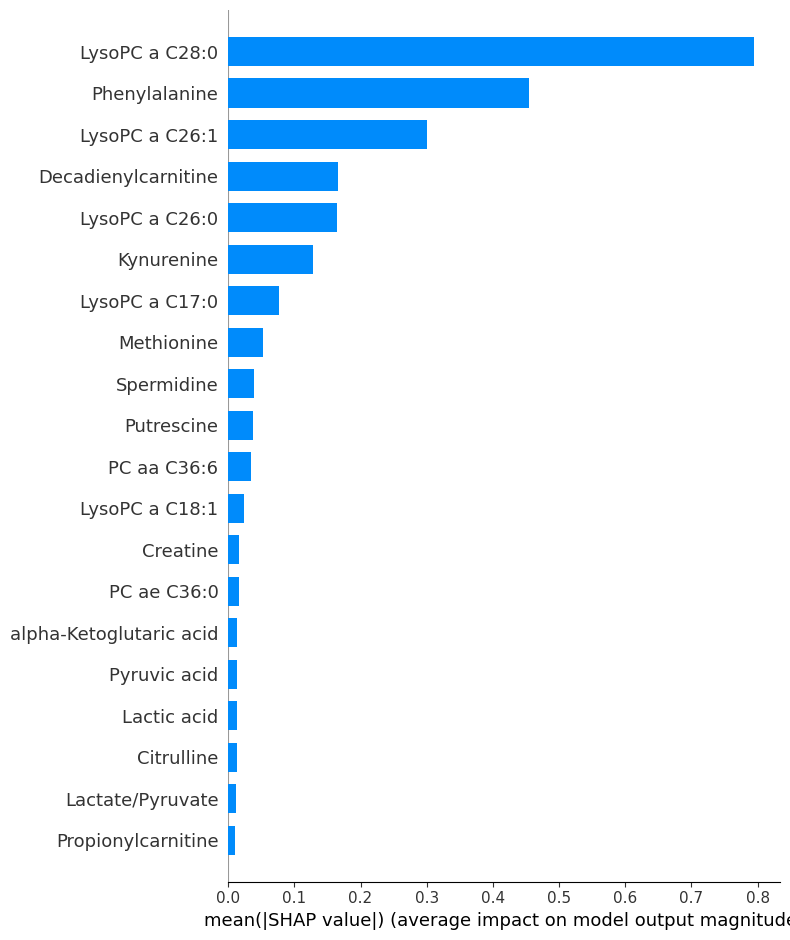

In [ ]:
shap.summary_plot(shap_values[4], X,plot_type='bar')

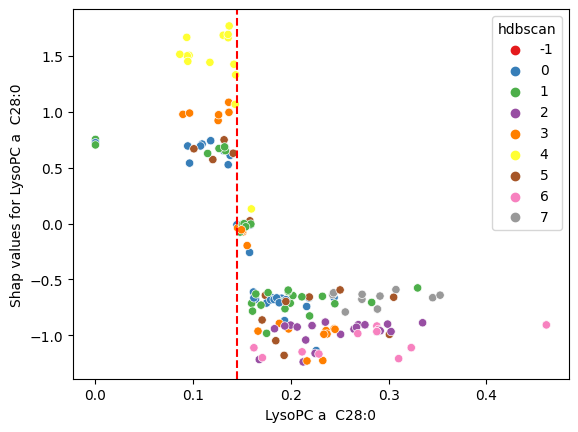

In [ ]:
xx= X['LysoPC a C28:0']
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)['LysoPC a C28:0']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('LysoPC a  C28:0')
plt.ylabel('Shap values for LysoPC a  C28:0')

# Draw a vertical line
x_value = 0.145  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


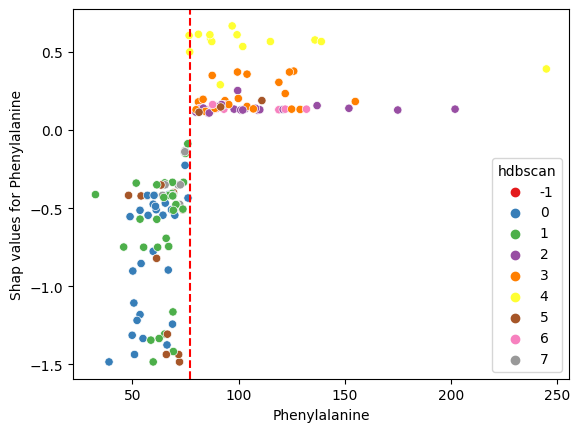

In [ ]:
xx= X['Phenylalanine']
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)['Phenylalanine']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('Phenylalanine')
plt.ylabel('Shap values for Phenylalanine')

# Draw a vertical line
x_value = 77  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

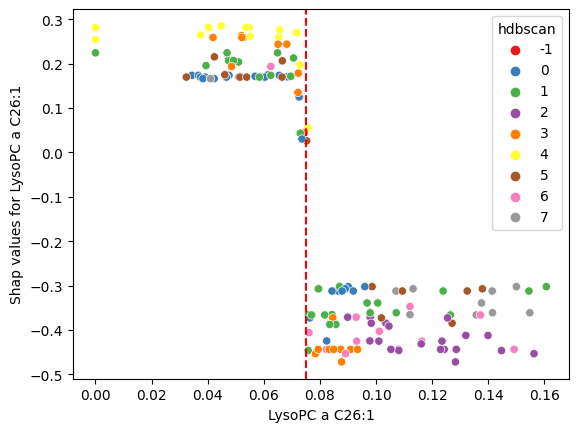

In [ ]:
xx= X['LysoPC a C26:1']
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)['LysoPC a C26:1']
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel('LysoPC a C26:1')
plt.ylabel('Shap values for LysoPC a C26:1')

# Draw a vertical line
x_value = 0.075  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

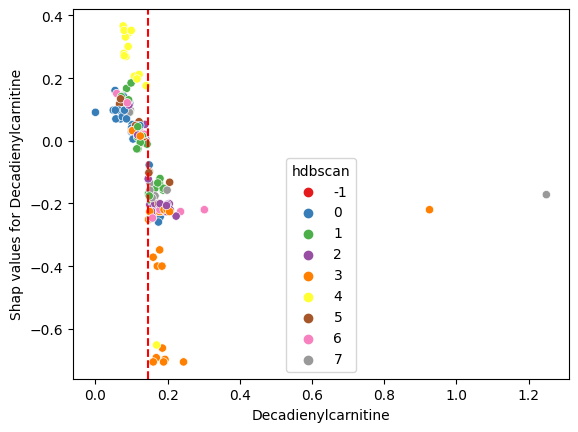

In [ ]:
string = "Decadienylcarnitine"
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.1450  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

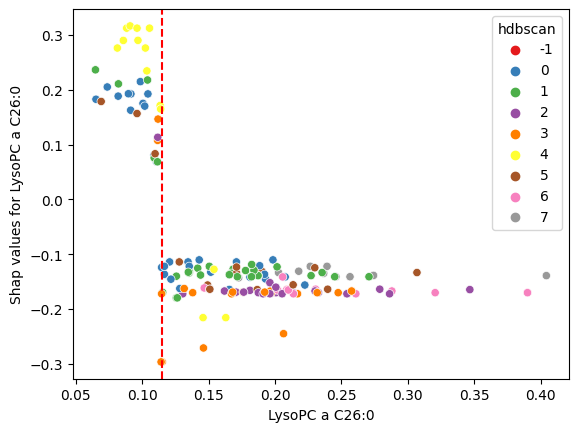

In [ ]:
string = "LysoPC a C26:0"
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.115  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

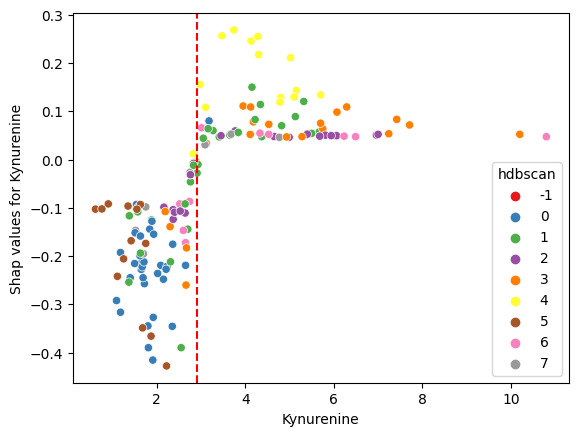

In [ ]:

string = "Kynurenine"
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 2.9  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

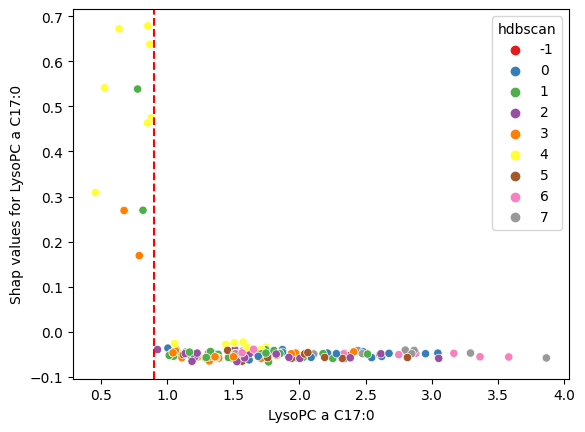

In [ ]:

string = "LysoPC a C17:0"
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.9  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

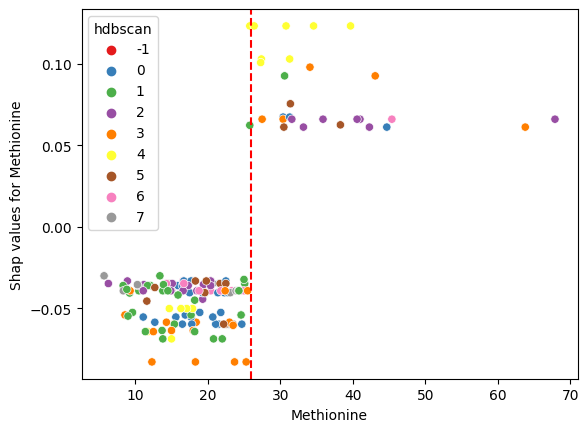

In [ ]:

string = "Methionine"
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 26  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster5

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



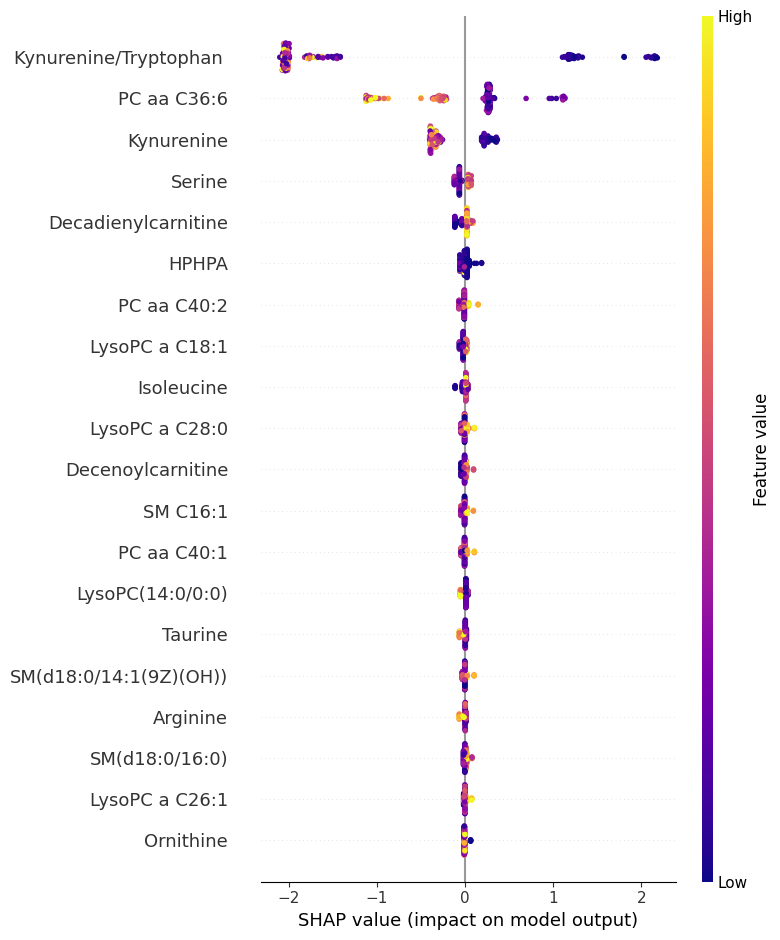

In [ ]:
shap.summary_plot(shap_values[5], X,cmap = "plasma")

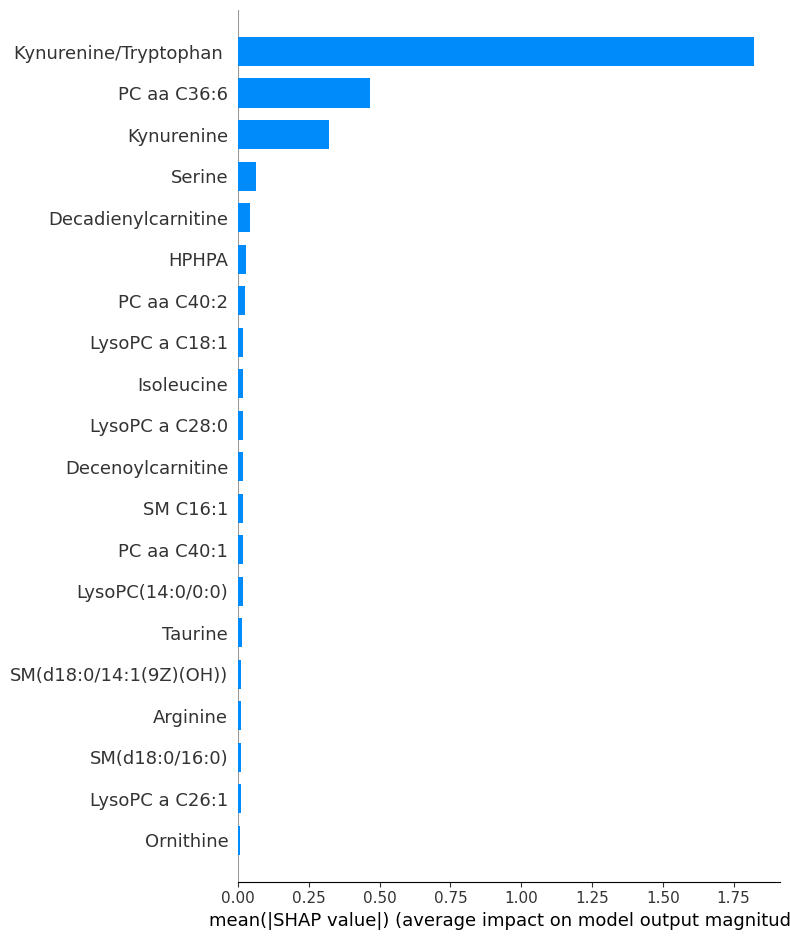

In [ ]:
shap.summary_plot(shap_values[5], X,plot_type='bar')

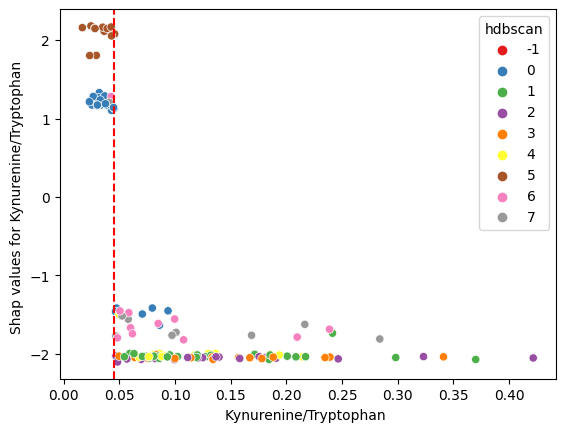

In [ ]:

string = 'Kynurenine/Tryptophan '
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.045  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

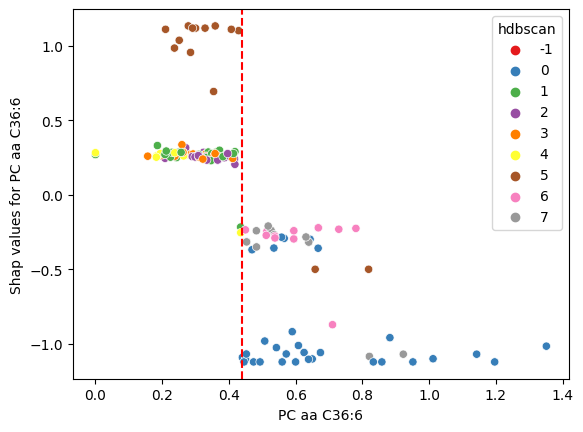

In [ ]:

string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.44  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

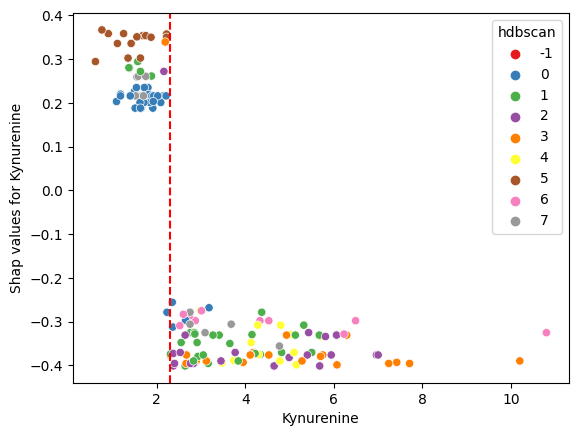

In [ ]:
string = 'Kynurenine'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 2.3  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

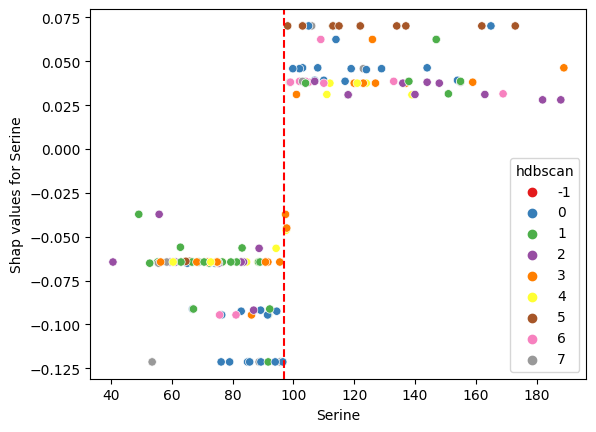

In [ ]:
string = 'Serine'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 97  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 6

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



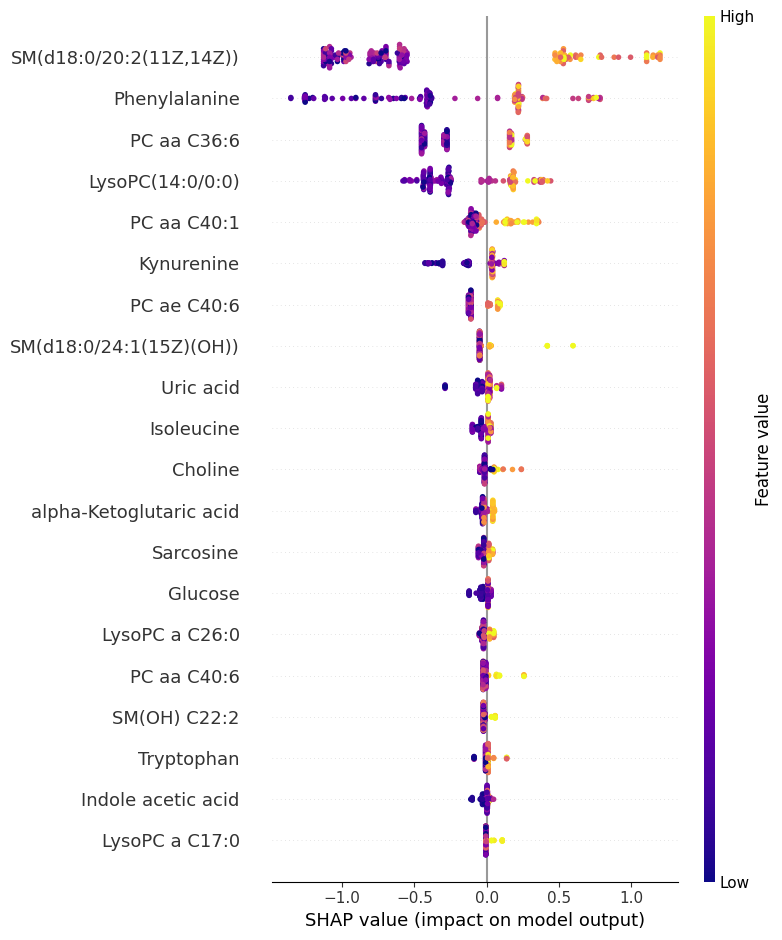

In [ ]:
shap.summary_plot(shap_values[6], X,cmap = "plasma")

In [ ]:
X['SM(d18:0/20:2(11Z,14Z))']

Folio
CV19-0007A    0.4371
CV19-0071A    0.6660
CV19-0079A    0.5881
CV19-0118A    0.5670
CV19-0125A    0.8496
               ...  
CV19-0830A    0.4406
CV19-0833A    0.4029
CV19-0834A    0.4813
CV19-0932A    0.2978
CV19-0936A    0.5505
Name: SM(d18:0/20:2(11Z,14Z)), Length: 164, dtype: float64

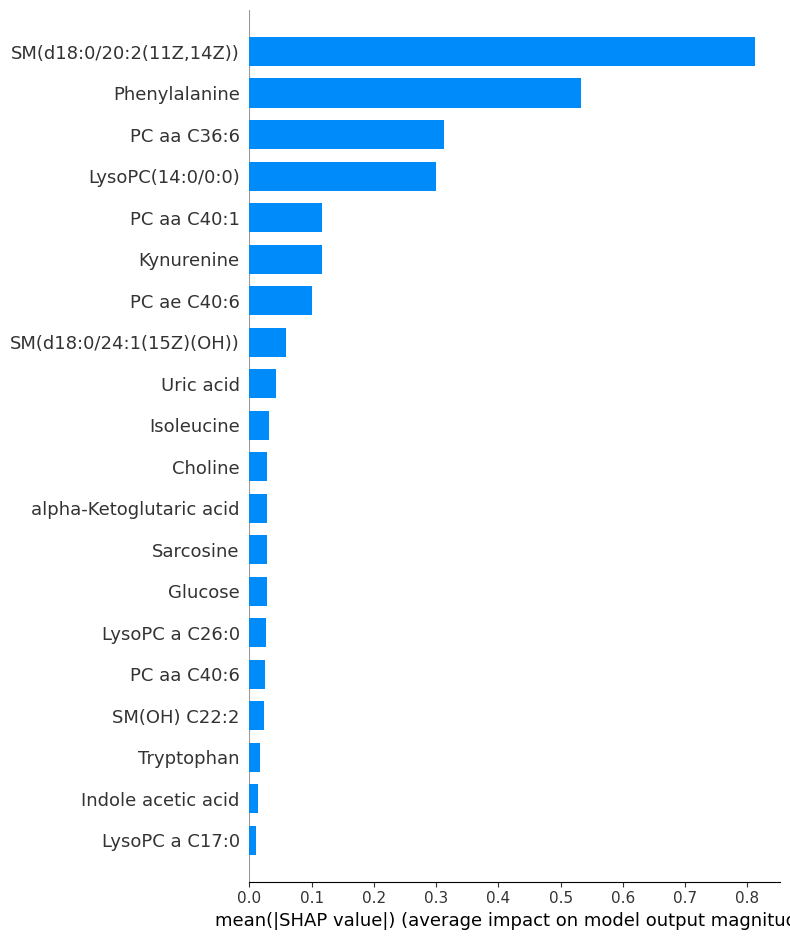

In [ ]:
shap.summary_plot(shap_values[6], X,plot_type='bar')

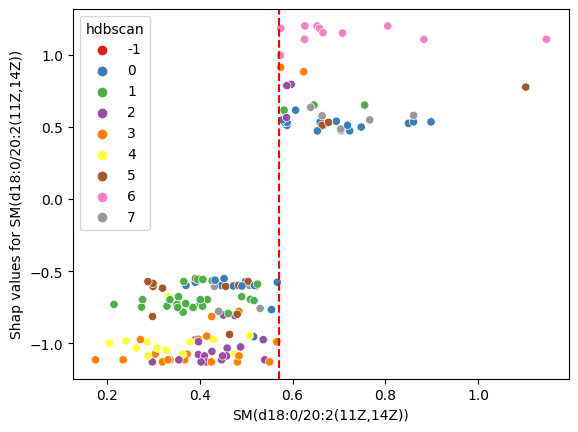

In [ ]:
string = 'SM(d18:0/20:2(11Z,14Z))'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.57  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

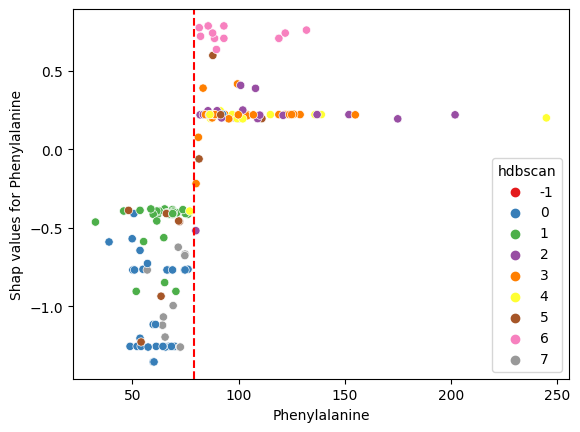

In [ ]:
string = 'Phenylalanine'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 79  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

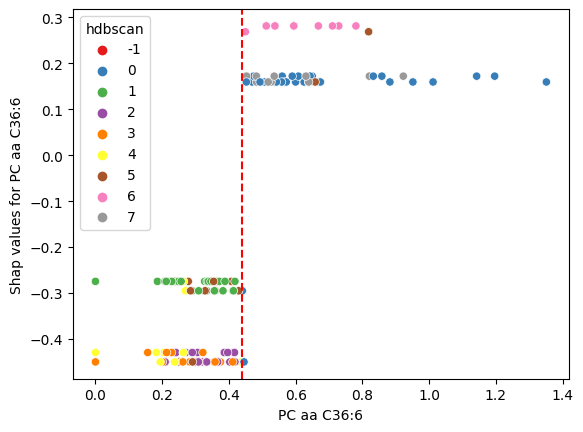

In [ ]:
string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.44  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

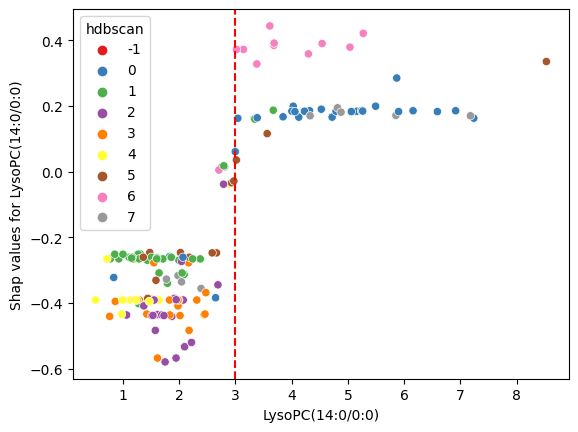

In [ ]:
string = 'LysoPC(14:0/0:0)'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 3.0  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

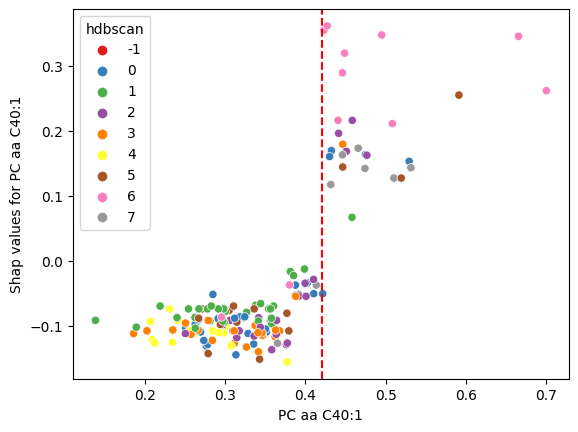

In [ ]:
string = 'PC aa C40:1'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.42 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

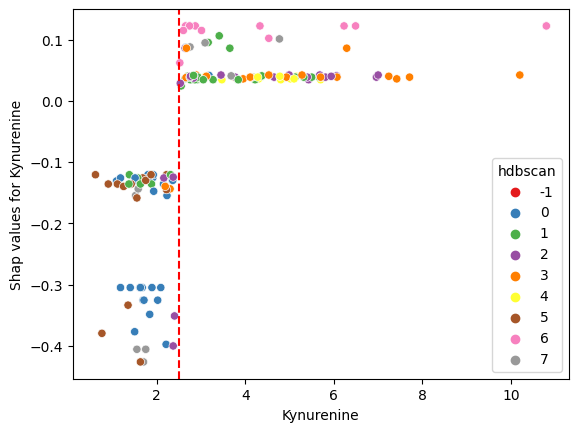

In [ ]:
string = 'Kynurenine'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 2.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

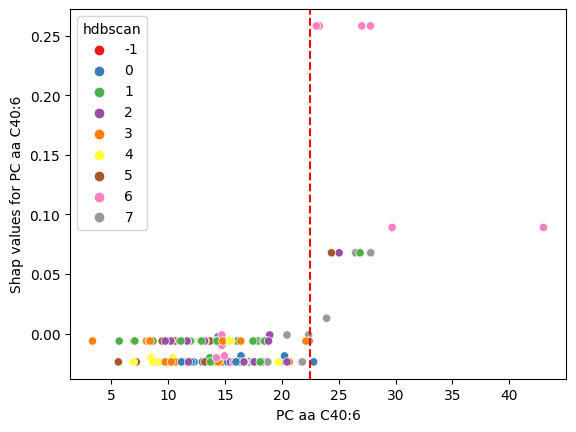

In [ ]:

string = 'PC aa C40:6'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 22.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

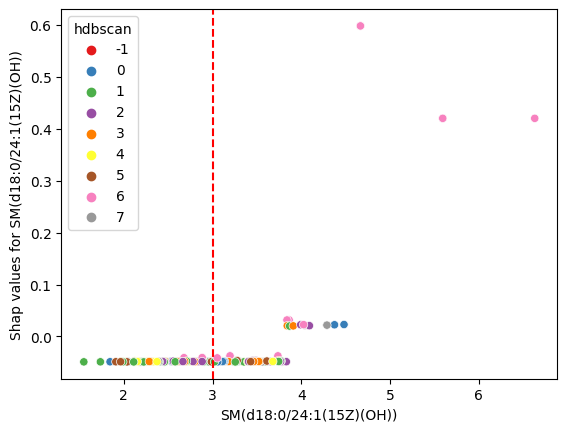

In [ ]:


string = 'SM(d18:0/24:1(15Z)(OH))'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 3 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



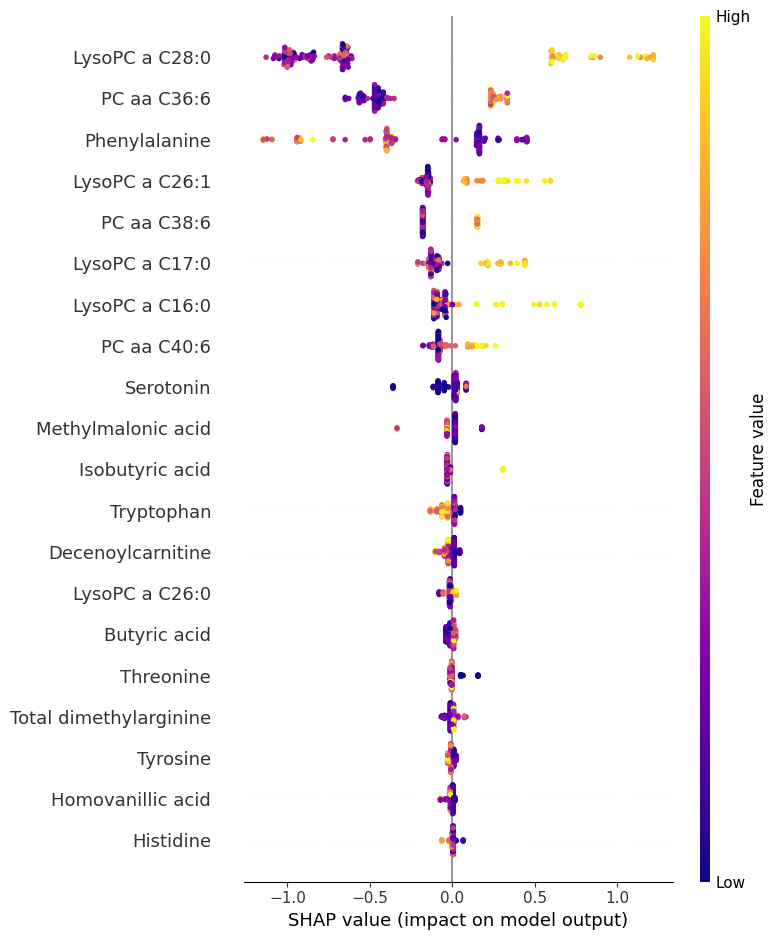

In [ ]:
shap.summary_plot(shap_values[7], X,cmap = "plasma")

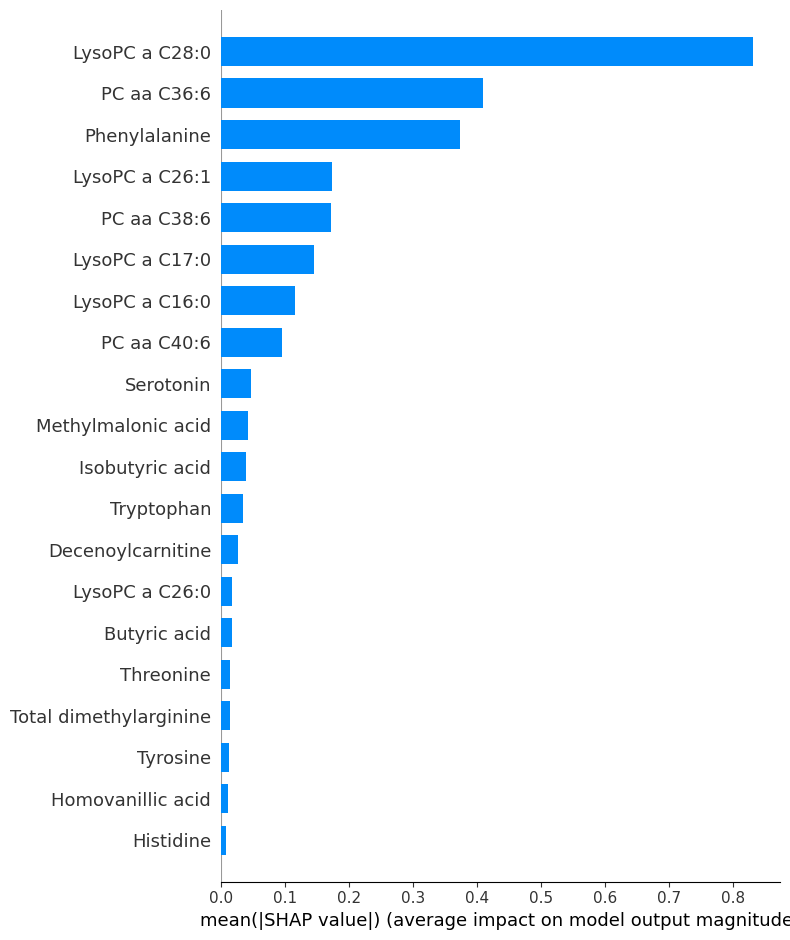

In [ ]:
shap.summary_plot(shap_values[7], X,plot_type='bar')

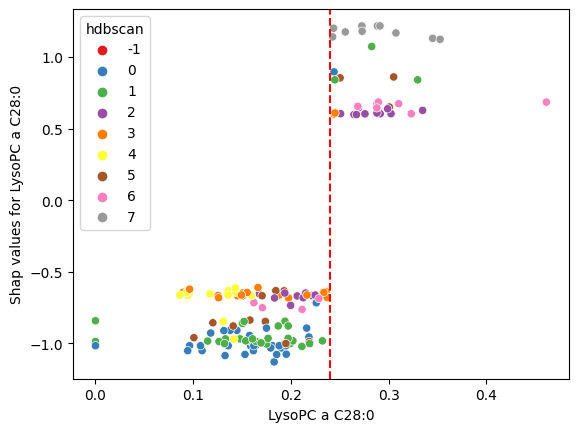

In [ ]:
string = 'LysoPC a C28:0'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.24 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

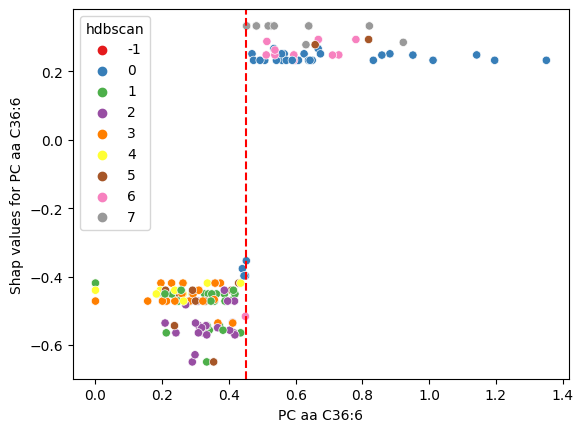

In [ ]:
string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.45 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

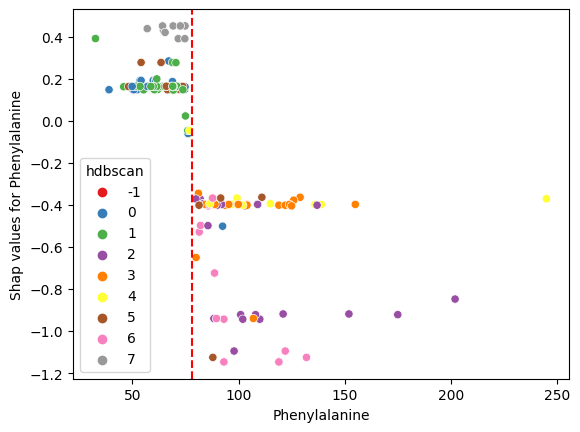

In [ ]:

string = 'Phenylalanine'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value =78 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

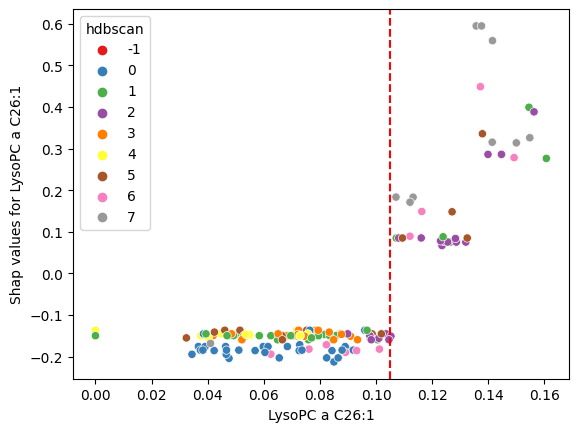

In [ ]:
string = 'LysoPC a C26:1'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value =0.105 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

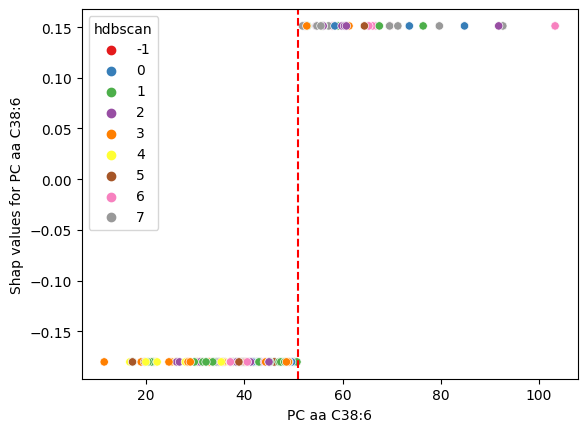

In [ ]:
string = 'PC aa C38:6'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value =51 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()